# Wikimedia Research - Translation Imbalances: Testing hypothesis #1


In this notebook we aim to find answer to research questions by interacting with the data sources relevant to it, __the related statement is__:
> Cultural context content account for a relevant portion of Wikipedia articles (7%-49%) and is less shared on average, which is causing the language imbalance on Wikipedia. Mass media-dominated content, which is more dominated by certain cultures, is more widely shared, and therefore, translated from larger and global languages more often.

__Research questions:__
- RQ 4.1.1 What type of content receives the biggest count?
- RQ. 4.1.2 What type of content receives the lowest count?

__Data sources__
- Data obtained from the APIs by language edition: https://www.mediawiki.org/wiki/API:Main_page
- Predictions of categories by article: https://www.mediawiki.org/wiki/ORES/Articletopic
- Obtaine pages by Wikipedia category: https://meta.wikimedia.org/wiki/PetScan/{wiki_language}

__Steps:__
1. Define the tool to use to get the top level categories of articles
2. Define the categories to use
3. Get pages belonging to a category (IDs)
4. Make API calls to get translation counts by page and aggregate by category
5. Explore further the groups of languages being translated and their pairs



__Concerns:__
- When comparing different articles, should be consider the source language or original language it was written in as a factor for diversity?


In [1]:
main_categories = ['Research', 'Library_science', 'Culture', 'The_arts', 'Geography', 
                   'Places', 'Health', 'Self-care', 'Health_care_occupations', 'History',
                   'Events', 'Formal_sciences','Mathematics', 'Logic', 'Mathematical_sciences',
                  'Science', 'Natural_sciences', 'Nature', 'People', 'Personal_life',
                  'Self', 'Surnames', 'Philosophy', 'Thought', 'Religion', 'Belief', 
                  'Society', 'Social_sciences', 'Technology', 'Applied_sciences']

len(main_categories)

30

In [2]:
# https://www.mediawiki.org/wiki/ORES/Articletopic
# https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids=1161522245

# Tests

### 1. Define the tool to use to get the top level categories of articles




### Testing the accuracy of the articletopic model from https://ores.wikimedia.org/

- We are fetching random articles via: https://en.wikipedia.org/w/api.php?action=query&list=random&rnnamespace=0&rnlimit=10
- We get the page titles and fecth the page URL via: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Binfo
- We go to each page, check the categories at the end and estimate a list of 3-4 expected categories based on this.
- We finally build a list with all of this information.

```
{
    "batchcomplete": "",
    "continue": {
        "rncontinue": "0.141236895977|0.141238067536|13009515|0",
        "continue": "-||"
    },
    "query": {
        "random": [
            {
                "id": 60265289,
                "ns": 0,
                "title": "African Women's classification in the Cape Epic"
            },
            {
                "id": 46434099,
                "ns": 0,
                "title": "Adrien Kela"
            },
            {
                "id": 60533443,
                "ns": 0,
                "title": "Kenneth Bunn"
            },
            {
                "id": 45482666,
                "ns": 0,
                "title": "Cyrtocris fulvicornis"
            },
            {
                "id": 1808010,
                "ns": 0,
                "title": "Islwyn (UK Parliament constituency)"
            },
              {
                "id": 47284944,
                "ns": 0,
                "title": "Capanne, San Marino",
                "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
            },
            
            {
                "id": 28276181,
                "ns": 0,
                "title": "1988 Virginia Slims of Arizona \u2013 Singles",
                "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
            },
            
            {
                "id": 22369872,
                "ns": 0,
                "title": "Herbert Munk",
                "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
            },
            
            {
                "id": 33607623,
                "ns": 0,
                "title": "Risky Business (House)",
                "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
            },
            
            {
                "id": 5864890,
                "ns": 0,
                "title": "Saskatchewan Glacier",
                "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
            },
            
            {
                "id": 4494842,
                "ns": 0,
                "title": "Printer cable",
                "url": "https://en.wikipedia.org/wiki/Printer_cable"
            },
            
            {
                "id": 43821884,
                "ns": 0,
                "title": "James Carruthers",
                "url": "https://en.wikipedia.org/wiki/James_Carruthers"
            },
            
            {
                "id": 41505702,
                "ns": 0,
                "title": "Hammer of Heaven",
                "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
            },
            
            {
                "id": 70186733,
                "ns": 0,
                "title": "The Kyiv Independent",
                "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
            },
            
            {
                "id": 1137772,
                "ns": 0,
                "title": "State room",
                "url": "https://en.wikipedia.org/wiki/State_room"
            },
            
            {
                "id": 43640804,
                "ns": 0,
                "title": "Trials of Kirstin Lobato",
                "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
            },
            
            {
                "id": 62111001,
                "ns": 0,
                "title": "Jessa Dillow Crisp",
                "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
            },
            
            {
                "id": 30634407,
                "ns": 0,
                "title": "Mingqi",
                "url": "https://en.wikipedia.org/wiki/Mingqi"
            },
            
            {
                "id": 8238870,
                "ns": 0,
                "title": "Metronome (artists' and writers' organ)",
                "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
            },
            
            {
                "id": 9155219,
                "ns": 0,
                "title": "Richard Beauchamp, 2nd Baron Beauchamp",
                "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
            },
            
            {
                "id": 26207504,
                "ns": 0,
                "title": "Single point of failure",
                "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
            },
            
            {
                "id": 50151305,
                "ns": 0,
                "title": "Ibrahim Al-Subaie",
                "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
            },
            
            {
                "id": 36718302,
                "ns": 0,
                "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
                "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
            },
            
            {
                "id": 34004381,
                "ns": 0,
                "title": "Viola renifolia",
                "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
            },
            
            {
                "id": 45715050,
                "ns": 0,
                "title": "LNWR 4ft 6in Tank Class",
                "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
            },
            
            
        ]
    }
}

```

The expected results are:
1. '60265289': ['Sports', 'Africa', 'Culture']
2. '4643409': ['Biography', 'Sports', 'Women']
3. '60533443': ['Biography', 'Sports']
4. '45482666': ['STEM', 'Biology', 'Earth and environment']
5. '1808010': ['Politics', 'History', 'Geography']
6. '47284944': ['Geography', 'Europe', 'Southern Europe', 'History']
7. '28276181' : ['Sports', 'Society', 'Culture']
8. '22369872': ['Biography', 'History', 'Geography']
9. '33607623': ['Media', 'Television', 'Entertainment', 'North America']
10. '5864890': ['North America', 'Americas', 'Geography']
11. '4494842': ['STEM', 'Computing', 'Engineering']
12. '43821884': ['Biography', 'History']

In [3]:
import requests

In [4]:
## Define the expected results

random = [
    {
        "id": 60265289,
        "ns": 0,
        "title": "African Women's classification in the Cape Epic"
    },
    {
        "id": 46434099,
        "ns": 0,
        "title": "Adrien Kela"
    },
    {
        "id": 60533443,
        "ns": 0,
        "title": "Kenneth Bunn"
    },
    {
        "id": 45482666,
        "ns": 0,
        "title": "Cyrtocris fulvicornis"
    },
    {
        "id": 1808010,
        "ns": 0,
        "title": "Islwyn (UK Parliament constituency)"
    },
      {
        "id": 47284944,
        "ns": 0,
        "title": "Capanne, San Marino",
        "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
    },

    {
        "id": 28276181,
        "ns": 0,
        "title": "1988 Virginia Slims of Arizona \u2013 Singles",
        "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
    },

    {
        "id": 22369872,
        "ns": 0,
        "title": "Herbert Munk",
        "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
    },

    {
        "id": 33607623,
        "ns": 0,
        "title": "Risky Business (House)",
        "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
    },

    {
        "id": 5864890,
        "ns": 0,
        "title": "Saskatchewan Glacier",
        "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
    },

    {
        "id": 4494842,
        "ns": 0,
        "title": "Printer cable",
        "url": "https://en.wikipedia.org/wiki/Printer_cable"
    },

    {
        "id": 43821884,
        "ns": 0,
        "title": "James Carruthers",
        "url": "https://en.wikipedia.org/wiki/James_Carruthers"
    },

    {
        "id": 41505702,
        "ns": 0,
        "title": "Hammer of Heaven",
        "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
    },

    {
        "id": 70186733,
        "ns": 0,
        "title": "The Kyiv Independent",
        "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
    },

    {
        "id": 1137772,
        "ns": 0,
        "title": "State room",
        "url": "https://en.wikipedia.org/wiki/State_room"
    },

    {
        "id": 43640804,
        "ns": 0,
        "title": "Trials of Kirstin Lobato",
        "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
    },

    {
        "id": 62111001,
        "ns": 0,
        "title": "Jessa Dillow Crisp",
        "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
    },

    {
        "id": 30634407,
        "ns": 0,
        "title": "Mingqi",
        "url": "https://en.wikipedia.org/wiki/Mingqi"
    },

    {
        "id": 8238870,
        "ns": 0,
        "title": "Metronome (artists' and writers' organ)",
        "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
    },

    {
        "id": 9155219,
        "ns": 0,
        "title": "Richard Beauchamp, 2nd Baron Beauchamp",
        "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
    },

    {
        "id": 26207504,
        "ns": 0,
        "title": "Single point of failure",
        "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
    },

    {
        "id": 50151305,
        "ns": 0,
        "title": "Ibrahim Al-Subaie",
        "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
    },

    {
        "id": 36718302,
        "ns": 0,
        "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
        "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
    },

    {
        "id": 34004381,
        "ns": 0,
        "title": "Viola renifolia",
        "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
    },

    {
        "id": 45715050,
        "ns": 0,
        "title": "LNWR 4ft 6in Tank Class",
        "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
    }
]




# these are the expected categories by ID
expected_categories = {
'60265289': ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'],
'46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
'60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
'45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
'1808010': ['History and Society.Politics and government', 'History and Society.History', 'Geography.Geographical'],
'47284944': ['Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Southern Europe', 'History and Society.History'],
'28276181' : ['Culture.Sports', 'Geography.Regions.Americas.North America*', 'Culture.Biography.Women'],
'22369872': ['Culture.Biography.Biography*', 'History and Society.History', 'Geography.Geographical'],
'33607623': ['Culture.Media.Media*', 'Culture.Media.Television', 'Culture.Media.Entertainment', 'North America'],
'5864890': ['Geography.Regions.Americas.North America', 'Geography.Regions.Americas', 'Geography.Geographical'],
'4494842': ['STEM.STEM*', 'STEM.Computing', 'STEM.Engineering'],
'43821884': ['Culture.Biography.Biography*', 'History and Society.History'],
'41505702': ['Culture.Media.Media*', 'Culture.Media.Music','Culture.Media.Radio', 'Culture.Media.Enterntainment'],
'70186733': ['Culture.Media.Media*', 'Culture.Media.Television','Culture.Internet Culture', 'Culture.Media.Enterntainment', 'History and Society.Politics and government'],
'1137772': ['History and Society.History', 'Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'History and Society.Politics and government', 'Culture.Media.Media*', 'Culture.Performing arts', 'Culture.Visual arts.Visual arts*'],
'43640804': ['Culture.Biography.Women', 'History and Society.Society','History and Society.History'],
'62111001': ['Culture.Biography.Biography*', 'Culture.Media.Enterntainment', 'History and Society.History'],
'30634407': ['History and Society.History', 'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.North Asia*', 'Culture.Visual arts.Visual arts*'],
'8238870': ['Culture.Media.Media*', 'Culture.Visual arts.Visual arts*'],
'9155219': ['Culture.Biography.Biography*','Geography.Regions.Europe.Europe*'],
'26207504': ['STEM.STEM*', 'STEM.Engineering', 'STEM.Computing', 'STEM.Technology'],
'50151305': ['Culture.Biography.Biography*', 'History and Society.History','Culture.Sports'],
'36718302': ['Culture.Sports', 'Culture.Biography.Women'],
'34004381': ['Geography.Geographical', 'STEM.Biology', 'STEM.Earth and Environment'],
'45715050': ['History and Society.History', 'STEM.STEM*', 'STEM.Engineering', 'History and Society.Transportation'],
    
}

expected_categories

{'60265289': ['Culture.Sports',
  'Geography.Regions.Africa.Africa*',
  'Culture.Biography.Women'],
 '46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
 '1808010': ['History and Society.Politics and government',
  'History and Society.History',
  'Geography.Geographical'],
 '47284944': ['Geography.Geographical',
  'Geography.Regions.Europe.Europe*',
  'Geography.Regions.Europe.Southern Europe',
  'History and Society.History'],
 '28276181': ['Culture.Sports',
  'Geography.Regions.Americas.North America*',
  'Culture.Biography.Women'],
 '22369872': ['Culture.Biography.Biography*',
  'History and Society.History',
  'Geography.Geographical'],
 '33607623': ['Culture.Media.Media*',
  'Culture.Media.Television',
  'Culture.Media.Entertainment',
  'North America'],
 '5864890': ['Geography.Regions.Americas.North America',
  'Geography.Regions

In [5]:
## Process both results and merge togethers

articles_cat_merged = {}
titles = []

# for each item in the random list
for art in random:
    # get the id
    id_ = str(art['id'])
    article_cat_new = {'id': id_}
    article_cat_new['title'] = art['title'] 
    article_cat_new['expected_cat'] = expected_categories[id_]
    titles.append(art['title'])
    
    # set it
    articles_cat_merged[id_] = article_cat_new
    
articles_cat_merged

{'60265289': {'id': '60265289',
  'title': "African Women's classification in the Cape Epic",
  'expected_cat': ['Culture.Sports',
   'Geography.Regions.Africa.Africa*',
   'Culture.Biography.Women']},
 '46434099': {'id': '46434099',
  'title': 'Adrien Kela',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '60533443': {'id': '60533443',
  'title': 'Kenneth Bunn',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '45482666': {'id': '45482666',
  'title': 'Cyrtocris fulvicornis',
  'expected_cat': ['STEM.STEM*',
   'STEM.Biology',
   'STEM.Earth and environment']},
 '1808010': {'id': '1808010',
  'title': 'Islwyn (UK Parliament constituency)',
  'expected_cat': ['History and Society.Politics and government',
   'History and Society.History',
   'Geography.Geographical']},
 '47284944': {'id': '47284944',
  'title': 'Capanne, San Marino',
  'expected_cat': ['Geography.Geographical',
   'Geography.Regions.Europe.Europe*',
   'Geography.Regions.E

In [6]:
## Get last revision ID

revisions = {}

titles_str = "|".join(titles)   
url = f"https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles={titles_str}&rvprop=ids&format=json"

# Making a GET request
response = requests.get(url)
# See status code
status = response.status_code
res = response.json()

if status == 200:
    # process the results
    display(res)
    page_results = res['query']['pages']
    
    ids = list(articles_cat_merged.keys())
    # revisions - page id
    revisions_pages = {}
    for id_ in ids:
        page = page_results[id_] 
        revision_id = page['revisions'][-1]
        revisions_pages[id_] =  str(revision_id['revid'])
        
revisions_pages
    

{'batchcomplete': '',
 'query': {'pages': {'28276181': {'pageid': 28276181,
    'ns': 0,
    'title': '1988 Virginia Slims of Arizona – Singles',
    'revisions': [{'revid': 1097360621, 'parentid': 1083563900}]},
   '46434099': {'pageid': 46434099,
    'ns': 0,
    'title': 'Adrien Kela',
    'revisions': [{'revid': 1131896564, 'parentid': 885948410}]},
   '60265289': {'pageid': 60265289,
    'ns': 0,
    'title': "African Women's classification in the Cape Epic",
    'revisions': [{'revid': 1074183937, 'parentid': 995883150}]},
   '36718302': {'pageid': 36718302,
    'ns': 0,
    'title': "Biathlon at the 1994 Winter Olympics – Women's individual",
    'revisions': [{'revid': 1114685840, 'parentid': 1072599705}]},
   '47284944': {'pageid': 47284944,
    'ns': 0,
    'title': 'Capanne, San Marino',
    'revisions': [{'revid': 1099758502, 'parentid': 881640249}]},
   '45482666': {'pageid': 45482666,
    'ns': 0,
    'title': 'Cyrtocris fulvicornis',
    'revisions': [{'revid': 104560579

{'60265289': '1074183937',
 '46434099': '1131896564',
 '60533443': '1080503608',
 '45482666': '1045605798',
 '1808010': '1162679033',
 '47284944': '1099758502',
 '28276181': '1097360621',
 '22369872': '1140978713',
 '33607623': '1095806953',
 '5864890': '1114491070',
 '4494842': '844125533',
 '43821884': '1089350121',
 '41505702': '997006968',
 '70186733': '1163151823',
 '1137772': '1112910754',
 '43640804': '1154572734',
 '62111001': '1143997655',
 '30634407': '1158345780',
 '8238870': '1133609915',
 '9155219': '1156496402',
 '26207504': '1144873299',
 '50151305': '1155281273',
 '36718302': '1114685840',
 '34004381': '1013874582',
 '45715050': '1118005998'}

In [7]:
## Get the results

list_revi = list(revisions_pages.values())

revisions_list = "|".join(list_revi)
url = f"https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids={revisions_list}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

results_revisions = response.json()['enwiki']['scores']
results_revisions

200


{'1013874582': {'articletopic': {'score': {'prediction': ['STEM.Biology',
     'STEM.STEM*'],
    'probability': {'Culture.Biography.Biography*': 0.0031084317166924823,
     'Culture.Biography.Women': 0.0009803049121985946,
     'Culture.Food and drink': 0.09242336852454172,
     'Culture.Internet culture': 0.0008515363091863077,
     'Culture.Linguistics': 0.00043891420619759344,
     'Culture.Literature': 0.0017456126108263857,
     'Culture.Media.Books': 0.0004604924985425731,
     'Culture.Media.Entertainment': 0.0004764972955101787,
     'Culture.Media.Films': 0.0001387873874122645,
     'Culture.Media.Media*': 0.0027164223946625566,
     'Culture.Media.Music': 9.759401349092416e-05,
     'Culture.Media.Radio': 2.5379689320860085e-05,
     'Culture.Media.Software': 0.0009201269892380221,
     'Culture.Media.Television': 0.00014731442291482467,
     'Culture.Media.Video games': 2.4675836900989654e-05,
     'Culture.Performing arts': 0.00016681160955285787,
     'Culture.Philosophy 

In [8]:
## Compare the expected results with the actual results
passes = 0
total_size = len(articles_cat_merged)

for page_id in revisions_pages:
    revision_id = revisions_pages[page_id]
    item = articles_cat_merged[page_id]
    # get the predicted categories and expected categories
    actual_results = results_revisions[revision_id]['articletopic']['score']['prediction']
    expected_results = item['expected_cat']
    
    
    # compare results by checking for common items
    print(f'\n\nCOMPARING FOR {page_id} with title <<{item["title"]}>>')
    print(f'\nEXPECTED RESULTS: {expected_results} \nACTUAL RESULTS:{actual_results}')
    intersect = list(set(actual_results).intersection(expected_results))
    
    if intersect:
        passes +=1
        print(f'The article with the id {page_id} got exactly {len(intersect)} match(es) in the predicted results list')
        print(f'Status: {passes} passes out of {total_size}')
        
print(f'\n\nFinal result is: {(passes/total_size)*100}%')



COMPARING FOR 60265289 with title <<African Women's classification in the Cape Epic>>

EXPECTED RESULTS: ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Geography.Regions.Africa.Southern Africa']
The article with the id 60265289 got exactly 2 match(es) in the predicted results list
Status: 1 passes out of 25


COMPARING FOR 46434099 with title <<Adrien Kela>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Sports', 'Geography.Regions.Oceania']
The article with the id 46434099 got exactly 1 match(es) in the predicted results list
Status: 2 passes out of 25


COMPARING FOR 60533443 with title <<Kenneth Bunn>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports']
The article with the id 60533443 got exactly 2 match(es) in 

#### Supported languages

The supported languages are:
    - Czech
    - Korean
    - Vietnamese
    - Arabic
    - English
   
Notes:
- The results are still in English.
    
__Reference:__ https://ores-support-checklist.toolforge.org/

In [9]:
# Example of making a call with the cswiki (Czech)
ress = '22814052|22376572|22897051'
url = f"https://ores.wikimedia.org/v3/scores/cswiki/?models=articletopic&revids={ress}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

response.json()

200


{'cswiki': {'models': {'articletopic': {'version': '1.3.0'}},
  'scores': {'22376572': {'articletopic': {'score': {'prediction': ['Geography.Regions.Europe.Europe*',
       'History and Society.Military and warfare'],
      'probability': {'Culture.Biography.Biography*': 0.01734748973809565,
       'Culture.Biography.Women': 0.0008734782494353318,
       'Culture.Food and drink': 0.0033172337587473815,
       'Culture.Internet culture': 0.002627588131218483,
       'Culture.Linguistics': 0.009228339218182077,
       'Culture.Literature': 0.009496513305451145,
       'Culture.Media.Books': 0.002958332982475919,
       'Culture.Media.Entertainment': 0.002551308152631748,
       'Culture.Media.Films': 0.0005026620955611899,
       'Culture.Media.Media*': 0.021011287679556106,
       'Culture.Media.Music': 0.0004497918260572899,
       'Culture.Media.Radio': 0.00019531415828545804,
       'Culture.Media.Software': 0.0012731117686133658,
       'Culture.Media.Television': 0.0006339708230484

# Implementation

### 2. Define categories to use

In [1]:
## Get categories list and mappers by layers
import os
import yaml

directory = 'data/input/categories/taxonomy'
# corresponds to the top level categories [1st layer]
layer_cat_1st = []
# corresponds to the immediate inner categories after the top level categories [2nd layer]
layer_cat_2nd = {}
# correspond to the innermost categories after the inner categories [3rd layer]
layer_cat_3rd = {}

# iterate over each file to get all levels
for filename in os.listdir(directory):
    if filename.endswith(".yaml"):
        for top_cat, categories in yaml.safe_load(open(f'{directory}/{filename}')).items():
            # 1st layer
            layer_cat_1st.append(top_cat) 
            # 2nd layer
            layer_cat_2nd[top_cat] = list(categories.keys())
            # 3rd layer
            for cat, inner_cat in categories.items():
                if isinstance(inner_cat, dict):
                    layer_cat_3rd[cat] = list(inner_cat.keys())
                
    else:
        continue
# TODO: save results via Adam's libraries        
display("1ST LAYER:", layer_cat_1st )
display("2ND LAYER:", layer_cat_2nd )
display("3RD LAYER:", layer_cat_3rd )

'1ST LAYER:'

['Culture', 'Geography', 'History and Society', 'STEM']

'2ND LAYER:'

{'Culture': ['Biography',
  'Food and drink',
  'Internet culture',
  'Linguistics',
  'Literature',
  'Media',
  'Performing arts',
  'Philosophy and religion',
  'Sports',
  'Visual arts'],
 'Geography': ['Geographical', 'Regions'],
 'History and Society': ['History',
  'Society',
  'Business and economics',
  'Education',
  'Military and warfare',
  'Politics and government',
  'Transportation'],
 'STEM': ['STEM*',
  'Biology',
  'Chemistry',
  'Engineering',
  'Earth and environment',
  'Libraries & Information',
  'Computing',
  'Mathematics',
  'Medicine & Health',
  'Physics',
  'Space',
  'Technology']}

'3RD LAYER:'

{'Biography': ['Biography*', 'Women'],
 'Media': ['Media*',
  'Entertainment',
  'Music',
  'Films',
  'Books',
  'Radio',
  'Television',
  'Video games',
  'Software'],
 'Visual arts': ['Visual arts*',
  'Architecture',
  'Comics and Anime',
  'Fashion'],
 'Regions': ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']}

### 3. Get pages belonging to a category (IDs)

#### Steps:

- Given a top level category, get the immediate subcategories via:
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategorymembers
- Fetch the pages count for each and aggregate to find the total page count: 
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategoryinfo
- Calculate the ideal sample dsize. 
        

### English

In [2]:
## Map categories with the topics of the ORES model to retrieve pages
# to verify existance (manually) https://en.wikipedia.org/wiki/Special:CategoryTree

'''
__1st layer__
NOTES: it becomes problematic as some categories are too broad (i.e. STEM...) for the retrieval. 
To avoid losing/exclusing important info, we will start the research with the second layers and
group the results to analyze the first.
'''


layer_cat_2nd_prepare = layer_cat_2nd.copy()

# We have created a list that includes categories that are equivalent to the original but exist in the wiki
# STEM
layer_cat_2nd_prepare['STEM'] =  ['Biology','Chemistry','Engineering','Earth', 'Environmental science', 'Libraries',
                                  'Information', 'Computing','Mathematics', 'Medicine', 'Health','Physics',
                                  'Space','Technology']
# Culture
# Biography: ('Living People', 'Dead People')
layer_cat_2nd_prepare['Culture'] = ['Living People', 'Dead People' 'Food and drink', 'Internet culture', 'Linguistics',
                                  'Literature', 'Mass media', 'Performing arts', 'Philosophy', 'Religion', 'Sports', 'Visual arts']
# Geography
layer_cat_2nd_prepare['Geography'] = ['Geography', 'Regions']

# History and Society
layer_cat_2nd_prepare['History and Society'] = ['History', 'Society', 'Business', 'Economics', 'Education',
                                      'Military', 'War', 'Politics', 'Government', 'Transport']

On defining the ideal sample size for the analysis:

__Parameters:__
- Confidence level: 95%
- Margin of error: 5-3%. We will initially start with 3% and expand to 3%

__References:__ 
 - https://www.surveymonkey.com/mp/sample-size-calculator/
 - https://tools4dev.org/resources/how-to-choose-a-samplesize/#:~:text=Most%20statisticians%20agree%20that%20the,to%20survey%20all%20of%20them.

In [3]:
## API call to get subcategories

In [4]:
## API call to get counts

In [5]:
## Define ideal count for each category and retrieve pages




### 4. Make API calls to get translation counts by page and aggregate by category

We are using the tool PetScan: https://petscan.wmflabs.org/

- Input category and query the results. 
- Save the results in CSV format.
- Make API call to get the translation counts per page.
- Create a new dataset from results.

In [16]:
## Import libraries
import csv
import os
import pandas as pd
import requests

In [25]:
## iterate over each file to collect all data

directory = 'data/input/categories/pages-ids'

categories_2nd_mapper = {}
cat_count = 0

# TODO: use the cache function to save these results to files since they are relatively static
for filename in os.listdir(directory):
    
    if filename.endswith(".csv"):
        cat_count += 1
        filename_cat = filename.split('-')[0].capitalize()
        
        with open(f'{directory}/{filename}', mode='r', encoding="utf8") as csv_file:
            # read as a dictionary
            csv_reader = csv.DictReader(csv_file)    
               
            row_count = 0
            for row in csv_reader:
                row_count += 1
                row['langs_count'] = None
                row['category'] = filename_cat
                page_title = row['title'].replace('_', ' ') # Consider removing the _ with ' '
                categories_2nd_mapper[page_title] = row
                
            # we are printing this count to help reference the (rough) expected number of counts
            print(f"ROW COUNT: {row_count} -- CATEGORY {filename_cat}")
# out
print(f"\nCATEGORIES COUNT: {cat_count}")
print(f"NUMBER OF UNIQUE PAGE TITLES: {len(list(categories_2nd_mapper.keys()))}")

ROW COUNT: 387 -- CATEGORY Biography
ROW COUNT: 385 -- CATEGORY Biology
ROW COUNT: 385 -- CATEGORY Business
ROW COUNT: 385 -- CATEGORY Chemistry
ROW COUNT: 385 -- CATEGORY Computing
ROW COUNT: 385 -- CATEGORY Earth
ROW COUNT: 385 -- CATEGORY Economic
ROW COUNT: 385 -- CATEGORY Education
ROW COUNT: 385 -- CATEGORY Engineering
ROW COUNT: 385 -- CATEGORY Environment
ROW COUNT: 385 -- CATEGORY Food and drink
ROW COUNT: 385 -- CATEGORY Geography
ROW COUNT: 385 -- CATEGORY Government
ROW COUNT: 385 -- CATEGORY Health
ROW COUNT: 385 -- CATEGORY History
ROW COUNT: 385 -- CATEGORY Libraries
ROW COUNT: 385 -- CATEGORY Linguistics
ROW COUNT: 385 -- CATEGORY Literature
ROW COUNT: 385 -- CATEGORY Mathematics
ROW COUNT: 385 -- CATEGORY Media
ROW COUNT: 385 -- CATEGORY Medicine
ROW COUNT: 385 -- CATEGORY Military
ROW COUNT: 385 -- CATEGORY Performing arts
ROW COUNT: 385 -- CATEGORY Philosophy
ROW COUNT: 385 -- CATEGORY Physics
ROW COUNT: 385 -- CATEGORY Politics
ROW COUNT: 385 -- CATEGORY Regions
ROW

In [8]:
page_titles = list(categories_2nd_mapper.keys())
len(page_titles)

12117

In [9]:
## Get count for all pages


# Reference: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Blanglinkscount
import traceback
from time import sleep

from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# general
result_pages_counts = []
page_titles = list(categories_2nd_mapper.keys())
# TODO: extend the 'lang' to more languages
lang = 'en'

# set requests parameters to retry on 'Max retries exceeded with url' and have enough wait time between exceptions
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('https://', adapter)

# used to track call number
api_call_number = 0

# initialize
slice_start = -50
slice_end = 0
titles_len = len(page_titles)


while (slice_end < titles_len):
    try:
        # check to update slice values
        slice_start = slice_start + 50 
        slice_end =  slice_end + 50 
            
        print('\n\n\n')
        print(f"PAGE TITLE GROUP {page_titles[:5]}...")
        # work with page titles batches that make request per 50 titles within a user language group
        titles_l = page_titles[slice_start:slice_end]
        titles =  "|".join(titles_l)
        url = f'https://{lang}.wikipedia.org/w/api.php?action=query&prop=langlinkscount&titles={titles}&format=json'  

        # GET request
        response = session.get(url)
        print(f'\nResponse:  {response.json()}')
        
        if response.status_code != 200:
            raise Exception(f"The call failed: {response.status_code}")

        else:
            # See request JSON
            res = response.json()
            
            if res.get('query'):
                # save results to dictionary to process later
                res = res['query']['pages']
                result_pages_counts.append(res)


                api_call_number += 1
                print(f'\n\nPROGRESS: {slice_start}-{slice_end} \n\nCALL NUMBER: {api_call_number}')
            else: 
                raise Exception(res.get("error"))
            
    
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    
    except Exception as e:
        print(e)
        traceback.print_exc()
      






PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'16973645': {'pageid': 16973645, 'ns': 0, 'title': 'Amanda Oliveira', 'langlinkscount': 4}, '50693975': {'pageid': 50693975, 'ns': 0, 'title': 'Andreas Altmann', 'langlinkscount': 3}, '70851081': {'pageid': 70851081, 'ns': 0, 'title': 'Andrey Svintsov', 'langlinkscount': 1}, '3420968': {'pageid': 3420968, 'ns': 0, 'title': 'Andy Greenwald', 'langlinkscount': 3}, '63716335': {'pageid': 63716335, 'ns': 0, 'title': 'Anthi Papakonstantinou'}, '7338292': {'pageid': 7338292, 'ns': 0, 'title': 'Beaumont Hannant'}, '55989933': {'pageid': 55989933, 'ns': 0, 'title': 'Candela Andújar', 'langlinkscount': 6}, '58379856': {'pageid': 58379856, 'ns': 0, 'title': 'Carlos Tábora', 'langlinkscount': 2}, '31887064': {'pageid': 31887064, 'ns': 0, 'title': 'Chang Hyuk-jin', 'langlinkscount': 4}, '51407250': {'pageid': 5140725


Response:  {'batchcomplete': '', 'query': {'pages': {'17694959': {'pageid': 17694959, 'ns': 0, 'title': 'Alexis Danelón', 'langlinkscount': 4}, '26426830': {'pageid': 26426830, 'ns': 0, 'title': 'Alfie Joey'}, '60206707': {'pageid': 60206707, 'ns': 0, 'title': 'Barbara Hernandez', 'langlinkscount': 1}, '38820987': {'pageid': 38820987, 'ns': 0, 'title': 'Ben George', 'langlinkscount': 3}, '24899336': {'pageid': 24899336, 'ns': 0, 'title': 'Carol Joyce', 'langlinkscount': 1}, '35563146': {'pageid': 35563146, 'ns': 0, 'title': 'Cathy Chedal', 'langlinkscount': 6}, '3791085': {'pageid': 3791085, 'ns': 0, 'title': 'Cynthia Leonard', 'langlinkscount': 1}, '8722075': {'pageid': 8722075, 'ns': 0, 'title': 'Daniel Vaillant', 'langlinkscount': 7}, '3611411': {'pageid': 3611411, 'ns': 0, 'title': 'Darryll Lewis', 'langlinkscount': 2}, '2522121': {'pageid': 2522121, 'ns': 0, 'title': 'Denis Betts', 'langlinkscount': 3}, '11084640': {'pageid': 11084640, 'ns': 0, 'title': "Dhaffer L'Abidine", 'lang


Response:  {'batchcomplete': '', 'query': {'pages': {'3904630': {'pageid': 3904630, 'ns': 0, 'title': 'Aaron Fiora'}, '46308105': {'pageid': 46308105, 'ns': 0, 'title': 'Albina Rrahmani', 'langlinkscount': 4}, '1882022': {'pageid': 1882022, 'ns': 0, 'title': 'Alex Barron (American football)', 'langlinkscount': 3}, '57218535': {'pageid': 57218535, 'ns': 0, 'title': 'Alfred Bailey (Australian cricketer)', 'langlinkscount': 2}, '5788402': {'pageid': 5788402, 'ns': 0, 'title': 'Allison Balson', 'langlinkscount': 8}, '7006131': {'pageid': 7006131, 'ns': 0, 'title': 'Balthazar Armas'}, '2074972': {'pageid': 2074972, 'ns': 0, 'title': 'Bertrand Serlet', 'langlinkscount': 8}, '46533413': {'pageid': 46533413, 'ns': 0, 'title': 'Bianca Sánchez', 'langlinkscount': 5}, '2557867': {'pageid': 2557867, 'ns': 0, 'title': 'Boris Mikhailov (ice hockey)', 'langlinkscount': 22}, '39346919': {'pageid': 39346919, 'ns': 0, 'title': 'Boseko Lokombo', 'langlinkscount': 1}, '58565091': {'pageid': 58565091, 'ns


Response:  {'batchcomplete': '', 'query': {'pages': {'38713452': {'pageid': 38713452, 'ns': 0, 'title': 'Aki Thomas', 'langlinkscount': 1}, '33547445': {'pageid': 33547445, 'ns': 0, 'title': 'Alex Richards (journalist)'}, '2325155': {'pageid': 2325155, 'ns': 0, 'title': 'Alexander Yakovlev (diplomat)'}, '23508757': {'pageid': 23508757, 'ns': 0, 'title': 'Andreas Renschler', 'langlinkscount': 3}, '60499403': {'pageid': 60499403, 'ns': 0, 'title': 'Andy Fleming (activist)'}, '38392196': {'pageid': 38392196, 'ns': 0, 'title': 'Ari Taub (wrestler)', 'langlinkscount': 3}, '40107891': {'pageid': 40107891, 'ns': 0, 'title': 'Brandon Estrada'}, '25478576': {'pageid': 25478576, 'ns': 0, 'title': 'Brian Watts (ice hockey)', 'langlinkscount': 3}, '19347278': {'pageid': 19347278, 'ns': 0, 'title': 'Charlie Fellows (rugby union)'}, '3604846': {'pageid': 3604846, 'ns': 0, 'title': "Dan O'Brien (baseball executive)"}, '38698902': {'pageid': 38698902, 'ns': 0, 'title': 'Daniel Bednárik', 'langlinksco


Response:  {'batchcomplete': '', 'query': {'pages': {'4191': {'pageid': 4191, 'ns': 0, 'title': 'BCG vaccine', 'langlinkscount': 58}, '4460': {'pageid': 4460, 'ns': 0, 'title': 'Bacterial conjugation', 'langlinkscount': 30}, '4187': {'pageid': 4187, 'ns': 0, 'title': 'Bactericide', 'langlinkscount': 35}, '4185': {'pageid': 4185, 'ns': 0, 'title': 'Bacteriophage', 'langlinkscount': 68}, '4571': {'pageid': 4571, 'ns': 0, 'title': 'Baku (mythology)', 'langlinkscount': 17}, '4513': {'pageid': 4513, 'ns': 0, 'title': 'Banshee', 'langlinkscount': 45}, '4292': {'pageid': 4292, 'ns': 0, 'title': 'Base pair', 'langlinkscount': 48}, '4487': {'pageid': 4487, 'ns': 0, 'title': 'Bean', 'langlinkscount': 66}, '3833': {'pageid': 3833, 'ns': 0, 'title': 'Beowulf', 'langlinkscount': 79}, '4163': {'pageid': 4163, 'ns': 0, 'title': 'Bertrand Russell', 'langlinkscount': 122}, '4757': {'pageid': 4757, 'ns': 0, 'title': 'Bestiary', 'langlinkscount': 32}, '4906': {'pageid': 4906, 'ns': 0, 'title': 'Beta she


Response:  {'batchcomplete': '', 'query': {'pages': {'11994': {'pageid': 11994, 'ns': 0, 'title': 'Destroy All Monsters', 'langlinkscount': 16}, '10313': {'pageid': 10313, 'ns': 0, 'title': 'E. O. Wilson', 'langlinkscount': 51}, '10340': {'pageid': 10340, 'ns': 0, 'title': 'Ecdysis', 'langlinkscount': 27}, '9971': {'pageid': 9971, 'ns': 0, 'title': 'Eden Project', 'langlinkscount': 27}, '9730': {'pageid': 9730, 'ns': 0, 'title': 'Electron microscope', 'langlinkscount': 74}, '10273': {'pageid': 10273, 'ns': 0, 'title': 'Embryo drawing', 'langlinkscount': 3}, '10116': {'pageid': 10116, 'ns': 0, 'title': 'Endocytosis', 'langlinkscount': 45}, '9927': {'pageid': 9927, 'ns': 0, 'title': 'Endomembrane system', 'langlinkscount': 20}, '10286': {'pageid': 10286, 'ns': 0, 'title': 'Enver Hoxha', 'langlinkscount': 81}, '9944': {'pageid': 9944, 'ns': 0, 'title': 'Episome', 'langlinkscount': 8}, '10048': {'pageid': 10048, 'ns': 0, 'title': 'Ethanol', 'langlinkscount': 112}, '9737': {'pageid': 9737,


Response:  {'batchcomplete': '', 'query': {'pages': {'15235': {'pageid': 15235, 'ns': 0, 'title': 'Genomic imprinting', 'langlinkscount': 30}, '14384': {'pageid': 14384, 'ns': 0, 'title': 'HAL 9000', 'langlinkscount': 32}, '14374': {'pageid': 14374, 'ns': 0, 'title': 'Haematopoiesis', 'langlinkscount': 44}, '14348': {'pageid': 14348, 'ns': 0, 'title': 'Homo habilis', 'langlinkscount': 80}, '14403': {'pageid': 14403, 'ns': 0, 'title': 'Hydrogen peroxide', 'langlinkscount': 71}, '15514': {'pageid': 15514, 'ns': 0, 'title': 'Iblis', 'langlinkscount': 55}, '14631': {'pageid': 14631, 'ns': 0, 'title': 'Immanuel Kant', 'langlinkscount': 170}, '14958': {'pageid': 14958, 'ns': 0, 'title': 'Immune system', 'langlinkscount': 110}, '15188': {'pageid': 15188, 'ns': 0, 'title': 'In vitro', 'langlinkscount': 45}, '15187': {'pageid': 15187, 'ns': 0, 'title': 'In vivo', 'langlinkscount': 43}, '15018': {'pageid': 15018, 'ns': 0, 'title': 'Infusoria', 'langlinkscount': 22}, '14895': {'pageid': 14895, '


Response:  {'batchcomplete': '', 'query': {'pages': {'13593670': {'pageid': 13593670, 'ns': 0, 'title': 'ABC analysis', 'langlinkscount': 21}, '9605489': {'pageid': 9605489, 'ns': 0, 'title': 'Acuity Brands', 'langlinkscount': 3}, '30858021': {'pageid': 30858021, 'ns': 0, 'title': 'Apache OpenEJB', 'langlinkscount': 2}, '65393931': {'pageid': 65393931, 'ns': 0, 'title': 'Art gallery', 'langlinkscount': 29}, '12770471': {'pageid': 12770471, 'ns': 0, 'title': 'Beneficial interest'}, '36526': {'pageid': 36526, 'ns': 0, 'title': 'Cartel', 'langlinkscount': 51}, '73941859': {'pageid': 73941859, 'ns': 0, 'title': 'Challenge (Moroccan magazine)', 'langlinkscount': 2}, '67208515': {'pageid': 67208515, 'ns': 0, 'title': 'Chambers Ireland'}, '21699187': {'pageid': 21699187, 'ns': 0, 'title': 'Chief business development officer', 'langlinkscount': 1}, '18751478': {'pageid': 18751478, 'ns': 0, 'title': 'Chocolatier (video game)', 'langlinkscount': 2}, '58520578': {'pageid': 58520578, 'ns': 0, 'ti


Response:  {'batchcomplete': '', 'query': {'pages': {'2475816': {'pageid': 2475816, 'ns': 0, 'title': 'Bankruptcy discharge'}, '22999010': {'pageid': 22999010, 'ns': 0, 'title': 'Blockage discount'}, '29053639': {'pageid': 29053639, 'ns': 0, 'title': 'Bonita BPM', 'langlinkscount': 4}, '27416186': {'pageid': 27416186, 'ns': 0, 'title': 'Business Games'}, '2778933': {'pageid': 2778933, 'ns': 0, 'title': 'Business broker', 'langlinkscount': 22}, '1943968': {'pageid': 1943968, 'ns': 0, 'title': 'Cativa process', 'langlinkscount': 10}, '17787113': {'pageid': 17787113, 'ns': 0, 'title': 'Cellana (company)', 'langlinkscount': 1}, '57067601': {'pageid': 57067601, 'ns': 0, 'title': 'CloverWorks', 'langlinkscount': 21}, '99656': {'pageid': 99656, 'ns': 0, 'title': 'Creative destruction', 'langlinkscount': 26}, '12894259': {'pageid': 12894259, 'ns': 0, 'title': 'Côte des Landes'}, '1753454': {'pageid': 1753454, 'ns': 0, 'title': 'Dividend imputation', 'langlinkscount': 3}, '25654353': {'pageid'


Response:  {'batchcomplete': '', 'query': {'pages': {'1991706': {'pageid': 1991706, 'ns': 0, 'title': 'AMC Networks', 'langlinkscount': 11}, '74049118': {'pageid': 74049118, 'ns': 0, 'title': 'Anurag Batra'}, '2601548': {'pageid': 2601548, 'ns': 0, 'title': 'Arts centre', 'langlinkscount': 6}, '26176094': {'pageid': 26176094, 'ns': 0, 'title': 'Brand tribalism', 'langlinkscount': 1}, '14310639': {'pageid': 14310639, 'ns': 0, 'title': 'Broadwater Energy'}, '2412077': {'pageid': 2412077, 'ns': 0, 'title': 'Byssinosis', 'langlinkscount': 11}, '13439956': {'pageid': 13439956, 'ns': 0, 'title': 'Centro, Montevideo', 'langlinkscount': 6}, '23154038': {'pageid': 23154038, 'ns': 0, 'title': 'Channel coordination', 'langlinkscount': 1}, '28632367': {'pageid': 28632367, 'ns': 0, 'title': 'Chief innovation officer'}, '49597315': {'pageid': 49597315, 'ns': 0, 'title': 'Computer bureau', 'langlinkscount': 2}, '21087074': {'pageid': 21087074, 'ns': 0, 'title': 'Curtain coating', 'langlinkscount': 2


Response:  {'batchcomplete': '', 'query': {'pages': {'4260439': {'pageid': 4260439, 'ns': 0, 'title': '24SevenOffice', 'langlinkscount': 6}, '37785040': {'pageid': 37785040, 'ns': 0, 'title': 'Abandonment rate'}, '27429367': {'pageid': 27429367, 'ns': 0, 'title': 'Bavarian Auto Group', 'langlinkscount': 5}, '35004392': {'pageid': 35004392, 'ns': 0, 'title': 'British Estonian Chamber of Commerce', 'langlinkscount': 1}, '51081465': {'pageid': 51081465, 'ns': 0, 'title': 'Chemical protective clothing', 'langlinkscount': 1}, '30279470': {'pageid': 30279470, 'ns': 0, 'title': 'Copper Project'}, '218837': {'pageid': 218837, 'ns': 0, 'title': 'Delegation', 'langlinkscount': 17}, '3302651': {'pageid': 3302651, 'ns': 0, 'title': 'Department of Education (Ireland)', 'langlinkscount': 2}, '9080971': {'pageid': 9080971, 'ns': 0, 'title': "Designer's World"}, '12028001': {'pageid': 12028001, 'ns': 0, 'title': 'Enkeltpersonforetak', 'langlinkscount': 3}, '45229555': {'pageid': 45229555, 'ns': 0, 't


Response:  {'batchcomplete': '', 'query': {'pages': {'2767': {'pageid': 2767, 'ns': 0, 'title': 'ACE inhibitor', 'langlinkscount': 38}, '2473': {'pageid': 2473, 'ns': 0, 'title': 'Abacá', 'langlinkscount': 50}, '2330': {'pageid': 2330, 'ns': 0, 'title': 'Abbe number', 'langlinkscount': 32}, '2703': {'pageid': 2703, 'ns': 0, 'title': 'Aberration (astronomy)', 'langlinkscount': 43}, '3263': {'pageid': 3263, 'ns': 0, 'title': 'Acid rain', 'langlinkscount': 95}, '3038': {'pageid': 3038, 'ns': 0, 'title': 'Acid–base reaction', 'langlinkscount': 46}, '2838': {'pageid': 2838, 'ns': 0, 'title': 'Acrylic paint', 'langlinkscount': 42}, '2308': {'pageid': 2308, 'ns': 0, 'title': 'Actinide', 'langlinkscount': 96}, '2819': {'pageid': 2819, 'ns': 0, 'title': 'Aerodynamics', 'langlinkscount': 76}, '3262': {'pageid': 3262, 'ns': 0, 'title': 'Agar', 'langlinkscount': 67}, '2635': {'pageid': 2635, 'ns': 0, 'title': 'Agarose', 'langlinkscount': 18}, '2955': {'pageid': 2955, 'ns': 0, 'title': 'Alkali', '


Response:  {'batchcomplete': '', 'query': {'pages': {'6868': {'pageid': 6868, 'ns': 0, 'title': 'Caffeine', 'langlinkscount': 91}, '7522': {'pageid': 7522, 'ns': 0, 'title': 'Calorimetry', 'langlinkscount': 40}, '6949': {'pageid': 6949, 'ns': 0, 'title': 'Carbamazepine', 'langlinkscount': 42}, '7739': {'pageid': 7739, 'ns': 0, 'title': 'Carbide', 'langlinkscount': 48}, '7296': {'pageid': 7296, 'ns': 0, 'title': 'Cardiac glycoside', 'langlinkscount': 33}, '6986': {'pageid': 6986, 'ns': 0, 'title': 'Carotene', 'langlinkscount': 52}, '6944': {'pageid': 6944, 'ns': 0, 'title': 'Cathode', 'langlinkscount': 63}, '6943': {'pageid': 6943, 'ns': 0, 'title': 'Cathode ray', 'langlinkscount': 48}, '7807': {'pageid': 7807, 'ns': 0, 'title': 'Cavitation', 'langlinkscount': 46}, '6911': {'pageid': 6911, 'ns': 0, 'title': 'Cellulose', 'langlinkscount': 84}, '7834': {'pageid': 7834, 'ns': 0, 'title': 'Chain reaction', 'langlinkscount': 45}, '7446': {'pageid': 7446, 'ns': 0, 'title': 'Chalcolithic', 'l


Response:  {'batchcomplete': '', 'query': {'pages': {'12528': {'pageid': 12528, 'ns': 0, 'title': 'Cis–trans isomerism', 'langlinkscount': 43}, '11815': {'pageid': 11815, 'ns': 0, 'title': 'Food additive', 'langlinkscount': 57}, '13146': {'pageid': 13146, 'ns': 0, 'title': 'Gabbro', 'langlinkscount': 58}, '12243': {'pageid': 12243, 'ns': 0, 'title': 'Gadolinium', 'langlinkscount': 130}, '12241': {'pageid': 12241, 'ns': 0, 'title': 'Gallium', 'langlinkscount': 145}, '12858': {'pageid': 12858, 'ns': 0, 'title': 'Galvanization', 'langlinkscount': 31}, '12962': {'pageid': 12962, 'ns': 0, 'title': 'Gamma-Hydroxybutyric acid', 'langlinkscount': 45}, '12772': {'pageid': 12772, 'ns': 0, 'title': 'Gas mask', 'langlinkscount': 50}, '13160': {'pageid': 13160, 'ns': 0, 'title': 'Gelatin', 'langlinkscount': 62}, '12806': {'pageid': 12806, 'ns': 0, 'title': 'Gemstone', 'langlinkscount': 88}, '12242': {'pageid': 12242, 'ns': 0, 'title': 'Germanium', 'langlinkscount': 142}, '13017': {'pageid': 13017,


Response:  {'batchcomplete': '', 'query': {'pages': {'4349': {'pageid': 4349, 'ns': 0, 'title': 'BBC Red Button', 'langlinkscount': 5}, '4080': {'pageid': 4080, 'ns': 0, 'title': 'BQP', 'langlinkscount': 11}, '4505': {'pageid': 4505, 'ns': 0, 'title': 'Backbone cabal', 'langlinkscount': 2}, '4251': {'pageid': 4251, 'ns': 0, 'title': 'Baháʼí Faith', 'langlinkscount': 128}, '4820': {'pageid': 4820, 'ns': 0, 'title': 'Balfour Declaration', 'langlinkscount': 68}, '4819': {'pageid': 4819, 'ns': 0, 'title': 'Balfour Declaration of 1926', 'langlinkscount': 23}, '4232': {'pageid': 4232, 'ns': 0, 'title': 'Barter', 'langlinkscount': 67}, '4736': {'pageid': 4736, 'ns': 0, 'title': 'Bastard Operator From Hell', 'langlinkscount': 12}, '4748': {'pageid': 4748, 'ns': 0, 'title': 'Baudot code', 'langlinkscount': 25}, '4789': {'pageid': 4789, 'ns': 0, 'title': 'Behistun Inscription', 'langlinkscount': 64}, '4706': {'pageid': 4706, 'ns': 0, 'title': 'Berkeley DB', 'langlinkscount': 15}, '5036': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'12667': {'pageid': 12667, 'ns': 0, 'title': 'Book of Genesis', 'langlinkscount': 134}, '10333': {'pageid': 10333, 'ns': 0, 'title': 'EFTPOS', 'langlinkscount': 3}, '10236': {'pageid': 10236, 'ns': 0, 'title': 'ELIZA effect', 'langlinkscount': 10}, '10268': {'pageid': 10268, 'ns': 0, 'title': 'Editor war', 'langlinkscount': 12}, '9970': {'pageid': 9970, 'ns': 0, 'title': 'Eightfold path (policy analysis)', 'langlinkscount': 1}, '9790': {'pageid': 9790, 'ns': 0, 'title': 'Electronic data interchange', 'langlinkscount': 33}, '10413': {'pageid': 10413, 'ns': 0, 'title': 'Enchiridion of Epictetus', 'langlinkscount': 16}, '10294': {'pageid': 10294, 'ns': 0, 'title': 'Encryption', 'langlinkscount': 67}, '10166': {'pageid': 10166, 'ns': 0, 'title': 'Enron', 'langlinkscount': 34}, '10074': {'pageid': 10074, 'ns': 0, 'title': 'Epitaph', 'langlinkscount': 54}, '10283': {'pageid': 10283, 'ns': 0, 'title': 'Erlang (unit)', 'langlinkscount': 20}


Response:  {'batchcomplete': '', 'query': {'pages': {'15445': {'pageid': 15445, 'ns': 0, 'title': 'Entropy (information theory)', 'langlinkscount': 44}, '17112': {'pageid': 17112, 'ns': 0, 'title': 'HMAC', 'langlinkscount': 18}, '15403': {'pageid': 15403, 'ns': 0, 'title': 'ISO 4217', 'langlinkscount': 100}, '15508': {'pageid': 15508, 'ns': 0, 'title': 'Industrial espionage', 'langlinkscount': 26}, '15368': {'pageid': 15368, 'ns': 0, 'title': 'Insider trading', 'langlinkscount': 34}, '15459': {'pageid': 15459, 'ns': 0, 'title': 'International Classification of Diseases', 'langlinkscount': 69}, '15476': {'pageid': 15476, 'ns': 0, 'title': 'Internet protocol suite', 'langlinkscount': 78}, '15467': {'pageid': 15467, 'ns': 0, 'title': 'Interrupt latency', 'langlinkscount': 3}, '16438': {'pageid': 16438, 'ns': 0, 'title': 'JANET'}, '16009': {'pageid': 16009, 'ns': 0, 'title': 'JPEG', 'langlinkscount': 65}, '15630': {'pageid': 15630, 'ns': 0, 'title': 'James Cook', 'langlinkscount': 154}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'2618': {'pageid': 2618, 'ns': 0, 'title': 'Aeacus', 'langlinkscount': 48}, '3124': {'pageid': 3124, 'ns': 0, 'title': 'Afterglow', 'langlinkscount': 21}, '2926': {'pageid': 2926, 'ns': 0, 'title': 'Antarctic', 'langlinkscount': 64}, '2747': {'pageid': 2747, 'ns': 0, 'title': 'Arabian Sea', 'langlinkscount': 122}, '3049': {'pageid': 3049, 'ns': 0, 'title': 'Autumn', 'langlinkscount': 174}, '4566': {'pageid': 4566, 'ns': 0, 'title': 'Baku', 'langlinkscount': 203}, '3335': {'pageid': 3335, 'ns': 0, 'title': 'Baltic Sea', 'langlinkscount': 170}, '3455': {'pageid': 3455, 'ns': 0, 'title': 'Barbados', 'langlinkscount': 223}, '4041': {'pageid': 4041, 'ns': 0, 'title': 'Bede', 'langlinkscount': 67}, '3457': {'pageid': 3457, 'ns': 0, 'title': 'Belarus', 'langlinkscount': 276}, '4170': {'pageid': 4170, 'ns': 0, 'title': 'Benelux', 'langlinkscount': 88}, '4862': {'pageid': 4862, 'ns': 0, 'title': 'Bengal', 'langlinkscount': 91}, '3459': {'pag


Response:  {'batchcomplete': '', 'query': {'pages': {'10106': {'pageid': 10106, 'ns': 0, 'title': 'Earthquake', 'langlinkscount': 176}, '9770': {'pageid': 9770, 'ns': 0, 'title': 'Eclipse', 'langlinkscount': 88}, '10531': {'pageid': 10531, 'ns': 0, 'title': 'El Niño', 'langlinkscount': 101}, '9356': {'pageid': 9356, 'ns': 0, 'title': 'El Salvador', 'langlinkscount': 224}, '10479': {'pageid': 10479, 'ns': 0, 'title': 'Elba', 'langlinkscount': 81}, '10091': {'pageid': 10091, 'ns': 0, 'title': 'Environmental law', 'langlinkscount': 43}, '9419': {'pageid': 9419, 'ns': 0, 'title': 'Eocene', 'langlinkscount': 75}, '9757': {'pageid': 9757, 'ns': 0, 'title': 'Eon (geology)', 'langlinkscount': 50}, '9366': {'pageid': 9366, 'ns': 0, 'title': 'Equatorial Guinea', 'langlinkscount': 224}, '9758': {'pageid': 9758, 'ns': 0, 'title': 'Era', 'langlinkscount': 31}, '9578': {'pageid': 9578, 'ns': 0, 'title': 'European Economic Community', 'langlinkscount': 83}, '10172': {'pageid': 10172, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'3003358': {'pageid': 3003358, 'ns': 0, 'title': 'Butterfly Economics'}, '1908618': {'pageid': 1908618, 'ns': 0, 'title': 'Endogeneity (econometrics)', 'langlinkscount': 9}, '18524': {'pageid': 18524, 'ns': 0, 'title': 'Latin America', 'langlinkscount': 145}, '18730': {'pageid': 18730, 'ns': 0, 'title': 'Le Mans', 'langlinkscount': 84}, '18671': {'pageid': 18671, 'ns': 0, 'title': 'Lesser Poland', 'langlinkscount': 37}, '19780': {'pageid': 19780, 'ns': 0, 'title': 'List of islands of Michigan'}, '18577': {'pageid': 18577, 'ns': 0, 'title': 'Lusitania', 'langlinkscount': 54}, '19822': {'pageid': 19822, 'ns': 0, 'title': 'MV Tampa', 'langlinkscount': 5}, '19078': {'pageid': 19078, 'ns': 0, 'title': 'Macedonia (region)', 'langlinkscount': 67}, '18964': {'pageid': 18964, 'ns': 0, 'title': 'Madagascar', 'langlinkscount': 244}, '5808131': {'pageid': 5808131, 'ns': 0, 'title': 'Maffeo Pantaleoni', 'langlinkscount': 10}, '19088': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'9205547': {'pageid': 9205547, 'ns': 0, 'title': 'Alexander Nove', 'langlinkscount': 6}, '47078873': {'pageid': 47078873, 'ns': 0, 'title': 'Annuity', 'langlinkscount': 34}, '58629518': {'pageid': 58629518, 'ns': 0, 'title': 'Auditing, Review and Other Standards'}, '35727132': {'pageid': 35727132, 'ns': 0, 'title': 'Behavioral assumption'}, '1922122': {'pageid': 1922122, 'ns': 0, 'title': 'Cascade tax', 'langlinkscount': 2}, '1476440': {'pageid': 1476440, 'ns': 0, 'title': 'Cobweb model', 'langlinkscount': 14}, '258767': {'pageid': 258767, 'ns': 0, 'title': 'Competitor indexing', 'langlinkscount': 1}, '4132201': {'pageid': 4132201, 'ns': 0, 'title': "Consumers' co-operative", 'langlinkscount': 20}, '52956376': {'pageid': 52956376, 'ns': 0, 'title': 'Credit clearing'}, '4219543': {'pageid': 4219543, 'ns': 0, 'title': 'Crossing network', 'langlinkscount': 4}, '17683716': {'pageid': 17683716, 'ns': 0, 'title': 'Deutsche Bank Prize in F


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Young|Economics_of_participation|Nada_Eissa|Capital_account_(financial_accounting)|AP_Macroeconomics|War_risk_insurance|Financial_econometrics|Virtual_enterprise|Engineering_Exports_Promotion_Council|Batokunku|Jacob_Anton_Ness|Cambridge_capital_controversy|Jason_Fairbourne|Economic_anthropology|Nicolás_Dujovne|Maurice_Friedman|Global_Money_Week|Marc_Faber|Jérôme-Adolphe_Blanqui|Castle_Rock_Foundation|Muthoot_Technopolis|Gross_reproduction_rate|Jagdambika_Pal|Dark_matter_(economics)|Donald_Markwell|Ronald_Coase|Chartalism|Hahn's_problem|Economic_epidemiology|Institute_for_Structural_Research|The_Econometrics_Journal|Approved_Publication_Arrangement|Accelerator_effect|Geoffrey_Sayre-McCord|Beggar_thy_neighbour|The_Strategy_of_Economic_Development|Cournot_competition|Alfred_Müller-Armack|Institute_of_Economics,_Academia_Sinica|Bob_Johnston_(economist)|Private_equity_in_the_2020s|Druker_v__Commissioner_of_Internal_Revenue|Arm


Response:  {'batchcomplete': '', 'query': {'pages': {'57185932': {'pageid': 57185932, 'ns': 0, 'title': 'A Passion for Art: Renoir, Cezanne, Matisse, and Dr. Barnes'}, '37994784': {'pageid': 37994784, 'ns': 0, 'title': 'Alan Manning', 'langlinkscount': 3}, '25177271': {'pageid': 25177271, 'ns': 0, 'title': 'Alfredo Saad-Filho', 'langlinkscount': 3}, '30510739': {'pageid': 30510739, 'ns': 0, 'title': 'Andreu Mas-Colell', 'langlinkscount': 8}, '5190016': {'pageid': 5190016, 'ns': 0, 'title': 'Arts-based training', 'langlinkscount': 1}, '37151989': {'pageid': 37151989, 'ns': 0, 'title': 'Bibliography of encyclopedias: business, information and economics', 'langlinkscount': 1}, '73287616': {'pageid': 73287616, 'ns': 0, 'title': 'Biomedical Research Center'}, '42840352': {'pageid': 42840352, 'ns': 0, 'title': 'Brainly', 'langlinkscount': 9}, '2869356': {'pageid': 2869356, 'ns': 0, 'title': 'Buddhist economics', 'langlinkscount': 19}, '1725874': {'pageid': 1725874, 'ns': 0, 'title': 'Calgar


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Writers|Anna's_Archive|UNU-OP|Atlantykron|Sunsong|Hockerill_Educational_Foundation|Schmerenbeck_Educational_Centre_for_Gifted_and_Talented_Children|International_Scientific_Committee_on_Cultural_Landscapes|Self-supervised_learning|Play_money|Social_cognition|Lafayette_Morehouse|Educational_Review|Math_Arrow|House_system|Technological_University_of_the_Mixteca|List_of_graduation_songs|General_Education_in_a_Free_Society|Reading_Recovery|Ministry_of_Science_and_Education_(Croatia)|USERN|Eric_Hanushek|Liberty_District|Silva_Method|Parsons_USD_503|Romanian_Master_of_Mathematics_and_Sciences|Yoshio_Shimamoto|Machine_learning_in_physics|Harvard_fencing_scandal_of_2020|Jean_Augur|Permanent_European_Conference_for_the_Study_of_the_Rural_Landscape|Dual_enrollment|Hong_Kong_Baptist_University_School_of_Chinese_Medicine|Martha_Tracy|Ohio_Graduation_Test|Georgia_Educational_Technology_Fair|Advancing_Secondary_Science_Education_thru_T


Response:  {'batchcomplete': '', 'query': {'pages': {'2706791': {'pageid': 2706791, 'ns': 0, 'title': 'ATutor', 'langlinkscount': 8}, '51781811': {'pageid': 51781811, 'ns': 0, 'title': 'Acting coach', 'langlinkscount': 1}, '34837321': {'pageid': 34837321, 'ns': 0, 'title': 'Anthony Weston', 'langlinkscount': 2}, '49752215': {'pageid': 49752215, 'ns': 0, 'title': 'Benjamin D. Wood', 'langlinkscount': 1}, '48334756': {'pageid': 48334756, 'ns': 0, 'title': 'Berberian School', 'langlinkscount': 7}, '2887701': {'pageid': 2887701, 'ns': 0, 'title': 'Bible (screenwriting)', 'langlinkscount': 3}, '38780520': {'pageid': 38780520, 'ns': 0, 'title': 'Board of Intermediate and Secondary Education, Peshawar'}, '12545207': {'pageid': 12545207, 'ns': 0, 'title': 'Bremen clause', 'langlinkscount': 1}, '2100587': {'pageid': 2100587, 'ns': 0, 'title': 'Camphill Movement', 'langlinkscount': 14}, '54421320': {'pageid': 54421320, 'ns': 0, 'title': 'Canadian Modern Language Review', 'langlinkscount': 1}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'2815': {'pageid': 2815, 'ns': 0, 'title': 'Advanced Mobile Phone System', 'langlinkscount': 22}, '2861': {'pageid': 2861, 'ns': 0, 'title': 'Advertising', 'langlinkscount': 110}, '2948': {'pageid': 2948, 'ns': 0, 'title': 'Agner Krarup Erlang', 'langlinkscount': 18}, '3251': {'pageid': 3251, 'ns': 0, 'title': 'Amblygonite', 'langlinkscount': 20}, '3214': {'pageid': 3214, 'ns': 0, 'title': 'Amplifier figures of merit', 'langlinkscount': 1}, '2994': {'pageid': 2994, 'ns': 0, 'title': 'Anemometer', 'langlinkscount': 63}, '3022': {'pageid': 3022, 'ns': 0, 'title': 'Autonomous building', 'langlinkscount': 11}, '4868': {'pageid': 4868, 'ns': 0, 'title': 'B. F. Skinner', 'langlinkscount': 60}, '4052': {'pageid': 4052, 'ns': 0, 'title': 'BCPL', 'langlinkscount': 31}, '4403': {'pageid': 4403, 'ns': 0, 'title': 'BCS theory', 'langlinkscount': 31}, '3772': {'pageid': 3772, 'ns': 0, 'title': 'BMW', 'langlinkscount': 104}, '4459': {'pageid': 44


Response:  {'batchcomplete': '', 'query': {'pages': {'9931': {'pageid': 9931, 'ns': 0, 'title': 'Amplifier', 'langlinkscount': 43}, '8756': {'pageid': 8756, 'ns': 0, 'title': 'Daniel Dennett', 'langlinkscount': 45}, '8826': {'pageid': 8826, 'ns': 0, 'title': 'Davy lamp', 'langlinkscount': 26}, '9133': {'pageid': 9133, 'ns': 0, 'title': 'Dean Kamen', 'langlinkscount': 22}, '9008': {'pageid': 9008, 'ns': 0, 'title': 'Debit card', 'langlinkscount': 64}, '9541': {'pageid': 9541, 'ns': 0, 'title': 'Design of experiments', 'langlinkscount': 24}, '9101': {'pageid': 9101, 'ns': 0, 'title': 'Device driver', 'langlinkscount': 57}, '8966': {'pageid': 8966, 'ns': 0, 'title': 'Digital Access Signalling System 1'}, '8967': {'pageid': 8967, 'ns': 0, 'title': 'Digital Access Signalling System 2', 'langlinkscount': 1}, '8965': {'pageid': 8965, 'ns': 0, 'title': 'Digital Private Network Signalling System', 'langlinkscount': 4}, '8858': {'pageid': 8858, 'ns': 0, 'title': 'Digital compositing', 'langlink


Response:  {'batchcomplete': '', 'query': {'pages': {'22104657': {'pageid': 22104657, 'ns': 0, 'title': 'Agaricus placomyces', 'langlinkscount': 8}, '68724702': {'pageid': 68724702, 'ns': 0, 'title': 'Alexis Nikole Nelson'}, '5053550': {'pageid': 5053550, 'ns': 0, 'title': 'Arava Institute for Environmental Studies', 'langlinkscount': 1}, '14846529': {'pageid': 14846529, 'ns': 0, 'title': 'Arthropod defensin'}, '58036987': {'pageid': 58036987, 'ns': 0, 'title': 'Bahamas Plastic Movement', 'langlinkscount': 2}, '27395553': {'pageid': 27395553, 'ns': 0, 'title': 'Bjerrum plot', 'langlinkscount': 5}, '65559': {'pageid': 65559, 'ns': 0, 'title': 'Borate', 'langlinkscount': 31}, '2630316': {'pageid': 2630316, 'ns': 0, 'title': 'Brunt–Väisälä frequency', 'langlinkscount': 9}, '13735196': {'pageid': 13735196, 'ns': 0, 'title': 'Bungarotoxin', 'langlinkscount': 6}, '33113498': {'pageid': 33113498, 'ns': 0, 'title': 'Cape plc'}, '34588743': {'pageid': 34588743, 'ns': 0, 'title': 'Cause (medici


Response:  {'batchcomplete': '', 'query': {'pages': {'48924130': {'pageid': 48924130, 'ns': 0, 'title': 'Applied Energy', 'langlinkscount': 1}, '1637752': {'pageid': 1637752, 'ns': 0, 'title': 'Bank (geography)', 'langlinkscount': 26}, '22016602': {'pageid': 22016602, 'ns': 0, 'title': 'Bar (river morphology)', 'langlinkscount': 10}, '69730264': {'pageid': 69730264, 'ns': 0, 'title': 'Biofumigation', 'langlinkscount': 3}, '62375753': {'pageid': 62375753, 'ns': 0, 'title': 'Biogeographia'}, '488743': {'pageid': 488743, 'ns': 0, 'title': 'Carbon monoxide poisoning', 'langlinkscount': 42}, '2845591': {'pageid': 2845591, 'ns': 0, 'title': 'Cation-exchange capacity', 'langlinkscount': 19}, '3904828': {'pageid': 3904828, 'ns': 0, 'title': 'Chemical fouling inhibitors', 'langlinkscount': 1}, '17962735': {'pageid': 17962735, 'ns': 0, 'title': 'Clarifier', 'langlinkscount': 1}, '4322218': {'pageid': 4322218, 'ns': 0, 'title': 'Critical geography', 'langlinkscount': 17}, '129618': {'pageid': 12


Response:  {'batchcomplete': '', 'query': {'pages': {'23605014': {'pageid': 23605014, 'ns': 0, 'title': '1,1-Dichloro-1-fluoroethane', 'langlinkscount': 13}, '9239718': {'pageid': 9239718, 'ns': 0, 'title': '2000-watt society', 'langlinkscount': 10}, '7018285': {'pageid': 7018285, 'ns': 0, 'title': 'AlgaeBase', 'langlinkscount': 14}, '43238710': {'pageid': 43238710, 'ns': 0, 'title': 'Antarctic sea ice', 'langlinkscount': 6}, '46491037': {'pageid': 46491037, 'ns': 0, 'title': 'Association départementale Isère Drac Romanche', 'langlinkscount': 1}, '59716361': {'pageid': 59716361, 'ns': 0, 'title': 'Barbara Maher', 'langlinkscount': 1}, '26340834': {'pageid': 26340834, 'ns': 0, 'title': 'Barents–Kara Ice Sheet', 'langlinkscount': 3}, '31941229': {'pageid': 31941229, 'ns': 0, 'title': 'Bladder tank', 'langlinkscount': 6}, '42963378': {'pageid': 42963378, 'ns': 0, 'title': 'Desert riparian'}, '12294713': {'pageid': 12294713, 'ns': 0, 'title': 'Drake Landing Solar Community', 'langlinkscou


Response:  {'batchcomplete': '', 'query': {'pages': {'33526001': {'pageid': 33526001, 'ns': 0, 'title': 'Acceptable Market Name', 'langlinkscount': 1}, '23588906': {'pageid': 23588906, 'ns': 0, 'title': 'Adulterated food', 'langlinkscount': 4}, '663590': {'pageid': 663590, 'ns': 0, 'title': 'Bromelain', 'langlinkscount': 21}, '24332722': {'pageid': 24332722, 'ns': 0, 'title': 'Chromium(III) nicotinate', 'langlinkscount': 4}, '1547265': {'pageid': 1547265, 'ns': 0, 'title': 'Conventionally grown', 'langlinkscount': 1}, '54678988': {'pageid': 54678988, 'ns': 0, 'title': 'Dietary inflammatory index'}, '59660250': {'pageid': 59660250, 'ns': 0, 'title': 'Diseases of Animals Act'}, '4205756': {'pageid': 4205756, 'ns': 0, 'title': 'Dolphin drive hunting', 'langlinkscount': 10}, '3186008': {'pageid': 3186008, 'ns': 0, 'title': 'Esquilache Riots', 'langlinkscount': 10}, '17914692': {'pageid': 17914692, 'ns': 0, 'title': 'European Food Information Resource Network', 'langlinkscount': 6}, '53855


Response:  {'batchcomplete': '', 'query': {'pages': {'26971334': {'pageid': 26971334, 'ns': 0, 'title': '2010 United States tomato shortage', 'langlinkscount': 1}, '68218283': {'pageid': 68218283, 'ns': 0, 'title': '2021 South African unrest', 'langlinkscount': 19}, '72887841': {'pageid': 72887841, 'ns': 0, 'title': '2022–2023 Philippine onion crisis'}, '2121098': {'pageid': 2121098, 'ns': 0, 'title': 'Aftertaste', 'langlinkscount': 8}, '3672921': {'pageid': 3672921, 'ns': 0, 'title': 'Alanorarius'}, '59659820': {'pageid': 59659820, 'ns': 0, 'title': 'Animal Health Act 1981'}, '4094829': {'pageid': 4094829, 'ns': 0, 'title': 'Balance Bar', 'langlinkscount': 1}, '12861486': {'pageid': 12861486, 'ns': 0, 'title': 'Biosand filter', 'langlinkscount': 3}, '44290925': {'pageid': 44290925, 'ns': 0, 'title': "Bocuse d'Or", 'langlinkscount': 18}, '1309860': {'pageid': 1309860, 'ns': 0, 'title': 'Carbonatation', 'langlinkscount': 14}, '72234012': {'pageid': 72234012, 'ns': 0, 'title': 'Cereal M


Response:  {'batchcomplete': '', 'query': {'pages': {'21902856': {'pageid': 21902856, 'ns': 0, 'title': 'Air well (condenser)', 'langlinkscount': 11}, '3049561': {'pageid': 3049561, 'ns': 0, 'title': 'Airborne (dietary supplement)'}, '34156730': {'pageid': 34156730, 'ns': 0, 'title': 'An Edible History of Humanity', 'langlinkscount': 1}, '15598580': {'pageid': 15598580, 'ns': 0, 'title': 'Anisodus tanguticus', 'langlinkscount': 9}, '271056': {'pageid': 271056, 'ns': 0, 'title': 'Carnitine', 'langlinkscount': 43}, '42814669': {'pageid': 42814669, 'ns': 0, 'title': 'Clinical trials on glucosamine and chondroitin'}, '9972157': {'pageid': 9972157, 'ns': 0, 'title': 'Dexatrim'}, '2782304': {'pageid': 2782304, 'ns': 0, 'title': 'Dianazene', 'langlinkscount': 2}, '41302685': {'pageid': 41302685, 'ns': 0, 'title': 'Dietary biology of the golden eagle'}, '524762': {'pageid': 524762, 'ns': 0, 'title': 'European cuisine', 'langlinkscount': 24}, '2110723': {'pageid': 2110723, 'ns': 0, 'title': 'F


Response:  {'batchcomplete': '', 'query': {'pages': {'70445940': {'pageid': 70445940, 'ns': 0, 'title': '2022–2023 food crises', 'langlinkscount': 14}, '42043691': {'pageid': 42043691, 'ns': 0, 'title': 'Agricultural value chain', 'langlinkscount': 5}, '1654': {'pageid': 1654, 'ns': 0, 'title': 'Alypius of Antioch', 'langlinkscount': 4}, '2187': {'pageid': 2187, 'ns': 0, 'title': 'Antisemitism in the Arab world', 'langlinkscount': 7}, '52876222': {'pageid': 52876222, 'ns': 0, 'title': 'Artisanal food'}, '10632548': {'pageid': 10632548, 'ns': 0, 'title': 'Beef hormone controversy', 'langlinkscount': 4}, '16797425': {'pageid': 16797425, 'ns': 0, 'title': 'British Restaurant', 'langlinkscount': 1}, '49085532': {'pageid': 49085532, 'ns': 0, 'title': 'Circle of Poison', 'langlinkscount': 3}, '1151939': {'pageid': 1151939, 'ns': 0, 'title': 'Codex Alimentarius', 'langlinkscount': 25}, '47862666': {'pageid': 47862666, 'ns': 0, 'title': 'Cooking oil', 'langlinkscount': 55}, '7407': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'68567': {'pageid': 68567, 'ns': 0, 'title': 'Achish', 'langlinkscount': 8}, '59211': {'pageid': 59211, 'ns': 0, 'title': 'Altitude', 'langlinkscount': 63}, '68663': {'pageid': 68663, 'ns': 0, 'title': 'Anab', 'langlinkscount': 2}, '58704': {'pageid': 58704, 'ns': 0, 'title': 'Arbor Day Foundation'}, '69929': {'pageid': 69929, 'ns': 0, 'title': 'Arizona-Sonora Desert Museum', 'langlinkscount': 4}, '64501': {'pageid': 64501, 'ns': 0, 'title': 'Arrondissement', 'langlinkscount': 44}, '65748': {'pageid': 65748, 'ns': 0, 'title': 'Avonlea (Anne of Green Gables)', 'langlinkscount': 7}, '51509': {'pageid': 51509, 'ns': 0, 'title': 'County seat', 'langlinkscount': 34}, '72239': {'pageid': 72239, 'ns': 0, 'title': 'Energy-efficient landscaping', 'langlinkscount': 4}, '72584': {'pageid': 72584, 'ns': 0, 'title': 'Environmental geology', 'langlinkscount': 19}, '71882': {'pageid': 71882, 'ns': 0, 'title': 'FIPS county code', 'langlinkscount': 


Response:  {'batchcomplete': '', 'query': {'pages': {'143693': {'pageid': 143693, 'ns': 0, 'title': 'Adriano Balbi', 'langlinkscount': 8}, '159524': {'pageid': 159524, 'ns': 0, 'title': 'City manager', 'langlinkscount': 9}, '144571': {'pageid': 144571, 'ns': 0, 'title': 'Commercial Revolution', 'langlinkscount': 16}, '146339': {'pageid': 146339, 'ns': 0, 'title': 'Enhanced 9-1-1', 'langlinkscount': 1}, '160332': {'pageid': 160332, 'ns': 0, 'title': 'Ephemeris', 'langlinkscount': 53}, '143023': {'pageid': 143023, 'ns': 0, 'title': 'Equatorial bulge', 'langlinkscount': 9}, '145072': {'pageid': 145072, 'ns': 0, 'title': 'Failed state', 'langlinkscount': 42}, '141995': {'pageid': 141995, 'ns': 0, 'title': 'Forestry Commission', 'langlinkscount': 8}, '163225': {'pageid': 163225, 'ns': 0, 'title': 'Geopolitics', 'langlinkscount': 76}, '157024': {'pageid': 157024, 'ns': 0, 'title': 'Leaf mold', 'langlinkscount': 3}, '149466': {'pageid': 149466, 'ns': 0, 'title': 'List of black flags', 'langl


Response:  {'batchcomplete': '', 'query': {'pages': {'216877': {'pageid': 216877, 'ns': 0, 'title': 'A1 road (Great Britain)', 'langlinkscount': 17}, '194280': {'pageid': 194280, 'ns': 0, 'title': 'Abdullah Gan', 'langlinkscount': 1}, '198668': {'pageid': 198668, 'ns': 0, 'title': 'Abolition of the han system', 'langlinkscount': 23}, '216223': {'pageid': 216223, 'ns': 0, 'title': 'Biocide', 'langlinkscount': 34}, '216232': {'pageid': 216232, 'ns': 0, 'title': 'Bioregion', 'langlinkscount': 10}, '202557': {'pageid': 202557, 'ns': 0, 'title': 'Calanshio Sand Sea', 'langlinkscount': 8}, '203690': {'pageid': 203690, 'ns': 0, 'title': 'Coverage data', 'langlinkscount': 1}, '214529': {'pageid': 214529, 'ns': 0, 'title': 'Dependent territory', 'langlinkscount': 70}, '195113': {'pageid': 195113, 'ns': 0, 'title': 'Digital divide', 'langlinkscount': 46}, '196971': {'pageid': 196971, 'ns': 0, 'title': 'Ecological classification', 'langlinkscount': 5}, '206272': {'pageid': 206272, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'18737478': {'pageid': 18737478, 'ns': 0, 'title': "1964 Gabonese coup d'état", 'langlinkscount': 9}, '34006684': {'pageid': 34006684, 'ns': 0, 'title': '2011 Slovenian YouTube incident'}, '228540': {'pageid': 228540, 'ns': 0, 'title': '360-degree feedback', 'langlinkscount': 13}, '61641914': {'pageid': 61641914, 'ns': 0, 'title': '49th General Assembly of Newfoundland and Labrador'}, '12822783': {'pageid': 12822783, 'ns': 0, 'title': 'Absolutism (European history)', 'langlinkscount': 42}, '72580053': {'pageid': 72580053, 'ns': 0, 'title': 'Alfred McCormack'}, '2291469': {'pageid': 2291469, 'ns': 0, 'title': 'Bank of Tanzania', 'langlinkscount': 17}, '1288948': {'pageid': 1288948, 'ns': 0, 'title': 'Capability Maturity Model Integration', 'langlinkscount': 25}, '227314': {'pageid': 227314, 'ns': 0, 'title': 'Chandler wobble', 'langlinkscount': 10}, '60881220': {'pageid': 60881220, 'ns': 0, 'title': 'Chicago City Council Progressive 


Response:  {'batchcomplete': '', 'query': {'pages': {'70119528': {'pageid': 70119528, 'ns': 0, 'title': '10th Parliament of Solomon Islands'}, '27291214': {'pageid': 27291214, 'ns': 0, 'title': '2010 Transnational Constituent Assembly of Tamil Eelam election'}, '39953887': {'pageid': 39953887, 'ns': 0, 'title': 'Agricultural Development and Marketing Corporation', 'langlinkscount': 1}, '63671604': {'pageid': 63671604, 'ns': 0, 'title': 'Apparatus of the Government of Russia', 'langlinkscount': 2}, '8525490': {'pageid': 8525490, 'ns': 0, 'title': 'Bank of Algeria', 'langlinkscount': 13}, '12585491': {'pageid': 12585491, 'ns': 0, 'title': 'Chilean passport', 'langlinkscount': 11}, '2224208': {'pageid': 2224208, 'ns': 0, 'title': 'Cleanskin (security)', 'langlinkscount': 1}, '42665239': {'pageid': 42665239, 'ns': 0, 'title': 'Constituent Assembly of Libya', 'langlinkscount': 3}, '48324575': {'pageid': 48324575, 'ns': 0, 'title': 'Criminal Investigation Bureau', 'langlinkscount': 2}, '215


Response:  {'batchcomplete': '', 'query': {'pages': {'70415678': {'pageid': 70415678, 'ns': 0, 'title': '17th Niue Assembly'}, '33468658': {'pageid': 33468658, 'ns': 0, 'title': '2011 Molise regional election', 'langlinkscount': 3}, '61474619': {'pageid': 61474619, 'ns': 0, 'title': '7th Guam Legislature'}, '15480148': {'pageid': 15480148, 'ns': 0, 'title': '7th New Brunswick Legislature'}, '13821915': {'pageid': 13821915, 'ns': 0, 'title': 'AE-COPSD European Police Cross of Honor'}, '1762067': {'pageid': 1762067, 'ns': 0, 'title': 'Baruch Plan', 'langlinkscount': 10}, '30959304': {'pageid': 30959304, 'ns': 0, 'title': 'Block v. Hirsh'}, '27903431': {'pageid': 27903431, 'ns': 0, 'title': 'Bundespräsidialamt', 'langlinkscount': 4}, '59348696': {'pageid': 59348696, 'ns': 0, 'title': 'Ceremonial maces in the United Kingdom'}, '1083588': {'pageid': 1083588, 'ns': 0, 'title': 'Cyprus Broadcasting Corporation', 'langlinkscount': 20}, '37614039': {'pageid': 37614039, 'ns': 0, 'title': 'Demet


Response:  {'batchcomplete': '', 'query': {'pages': {'36343961': {'pageid': 36343961, 'ns': 0, 'title': '2012 Romanian constitutional crisis', 'langlinkscount': 2}, '765': {'pageid': 765, 'ns': 0, 'title': 'Abortion', 'langlinkscount': 143}, '305': {'pageid': 305, 'ns': 0, 'title': 'Achilles', 'langlinkscount': 99}, '145166': {'pageid': 145166, 'ns': 0, 'title': 'Act of Parliament', 'langlinkscount': 21}, '51098478': {'pageid': 51098478, 'ns': 0, 'title': 'African Union Passport', 'langlinkscount': 13}, '15718247': {'pageid': 15718247, 'ns': 0, 'title': 'Aho report', 'langlinkscount': 2}, '3295323': {'pageid': 3295323, 'ns': 0, 'title': 'American Joint Committee on Cancer', 'langlinkscount': 1}, '921': {'pageid': 921, 'ns': 0, 'title': 'Angst', 'langlinkscount': 16}, '922': {'pageid': 922, 'ns': 0, 'title': 'Anxiety', 'langlinkscount': 77}, '969': {'pageid': 969, 'ns': 0, 'title': 'Ataxia', 'langlinkscount': 45}, '50031888': {'pageid': 50031888, 'ns': 0, 'title': 'Auditor General of M


Response:  {'batchcomplete': '', 'query': {'pages': {'8474': {'pageid': 8474, 'ns': 0, 'title': 'Arthur Wellesley, 1st Duke of Wellington', 'langlinkscount': 80}, '10568': {'pageid': 10568, 'ns': 0, 'title': 'Association football', 'langlinkscount': 227}, '8884': {'pageid': 8884, 'ns': 0, 'title': 'Danse Macabre', 'langlinkscount': 44}, '8846': {'pageid': 8846, 'ns': 0, 'title': 'Datura', 'langlinkscount': 62}, '8308': {'pageid': 8308, 'ns': 0, 'title': 'Delft', 'langlinkscount': 84}, '9059': {'pageid': 9059, 'ns': 0, 'title': 'Dementia praecox', 'langlinkscount': 10}, '8791': {'pageid': 8791, 'ns': 0, 'title': 'Dennis Hopper', 'langlinkscount': 68}, '8460': {'pageid': 8460, 'ns': 0, 'title': 'Dieting'}, '8608': {'pageid': 8608, 'ns': 0, 'title': 'Dolmen', 'langlinkscount': 69}, '8678': {'pageid': 8678, 'ns': 0, 'title': 'Donn', 'langlinkscount': 8}, '8467': {'pageid': 8467, 'ns': 0, 'title': 'Draco (lawgiver)', 'langlinkscount': 47}, '10235': {'pageid': 10235, 'ns': 0, 'title': 'ELIZ


Response:  {'batchcomplete': '', 'query': {'pages': {'53463061': {'pageid': 53463061, 'ns': 0, 'title': '2016 in Guyana', 'langlinkscount': 1}, '58479332': {'pageid': 58479332, 'ns': 0, 'title': 'Acontisma', 'langlinkscount': 1}, '5929391': {'pageid': 5929391, 'ns': 0, 'title': 'Battle of Noáin', 'langlinkscount': 7}, '56847351': {'pageid': 56847351, 'ns': 0, 'title': 'Bavarian Forest Club', 'langlinkscount': 2}, '552586': {'pageid': 552586, 'ns': 0, 'title': 'Bernard Williams', 'langlinkscount': 27}, '64409487': {'pageid': 64409487, 'ns': 0, 'title': 'City of Hormuz Ardeshir', 'langlinkscount': 2}, '15378': {'pageid': 15378, 'ns': 0, 'title': 'Copper IUD', 'langlinkscount': 10}, '69738869': {'pageid': 69738869, 'ns': 0, 'title': 'Criterion of contextual credibility', 'langlinkscount': 1}, '59691369': {'pageid': 59691369, 'ns': 0, 'title': 'Epistemic cultures', 'langlinkscount': 1}, '15374': {'pageid': 15374, 'ns': 0, 'title': 'Food irradiation', 'langlinkscount': 25}, '76446': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'14541698': {'pageid': 14541698, 'ns': 0, 'title': '1831 in Mexico', 'langlinkscount': 2}, '72386443': {'pageid': 72386443, 'ns': 0, 'title': '1870 in Iceland'}, '21175135': {'pageid': 21175135, 'ns': 0, 'title': '2000 in the European Union', 'langlinkscount': 1}, '71620572': {'pageid': 71620572, 'ns': 0, 'title': '2021 in Palau'}, '39124': {'pageid': 39124, 'ns': 0, 'title': 'Aloysius Lilius', 'langlinkscount': 31}, '43494988': {'pageid': 43494988, 'ns': 0, 'title': 'Ancasmarca', 'langlinkscount': 3}, '32522434': {'pageid': 32522434, 'ns': 0, 'title': 'Barwari', 'langlinkscount': 5}, '24815566': {'pageid': 24815566, 'ns': 0, 'title': 'Betic corridor', 'langlinkscount': 2}, '44390632': {'pageid': 44390632, 'ns': 0, 'title': 'Bolnisi inscriptions', 'langlinkscount': 8}, '72237639': {'pageid': 72237639, 'ns': 0, 'title': 'Catherine Fleming Bruce'}, '2519259': {'pageid': 2519259, 'ns': 0, 'title': 'Charles van Onselen', 'langlinkscount


Response:  {'batchcomplete': '', 'query': {'pages': {'46308913': {'pageid': 46308913, 'ns': 0, 'title': '1819 in Brazil', 'langlinkscount': 2}, '50263651': {'pageid': 50263651, 'ns': 0, 'title': '2013 Country Liberal Party leadership spill'}, '71756243': {'pageid': 71756243, 'ns': 0, 'title': '2022 in Palau'}, '69713826': {'pageid': 69713826, 'ns': 0, 'title': 'Abu Simbel Phoenician graffiti'}, '1904629': {'pageid': 1904629, 'ns': 0, 'title': 'Action of May 1612', 'langlinkscount': 1}, '36283601': {'pageid': 36283601, 'ns': 0, 'title': "All Saints' Flood (1304)", 'langlinkscount': 1}, '3709469': {'pageid': 3709469, 'ns': 0, 'title': 'Androlepsy', 'langlinkscount': 6}, '53179425': {'pageid': 53179425, 'ns': 0, 'title': 'Angelo Bissessarsingh', 'langlinkscount': 2}, '95777': {'pageid': 95777, 'ns': 0, 'title': 'Atanua', 'langlinkscount': 2}, '26199368': {'pageid': 26199368, 'ns': 0, 'title': 'Bishop of Victoria', 'langlinkscount': 1}, '180394': {'pageid': 180394, 'ns': 0, 'title': 'Butr


Response:  {'batchcomplete': '', 'query': {'pages': {'34558': {'pageid': 34558, 'ns': 0, 'title': '20th century', 'langlinkscount': 169}, '61406175': {'pageid': 61406175, 'ns': 0, 'title': '4Q127', 'langlinkscount': 1}, '59695059': {'pageid': 59695059, 'ns': 0, 'title': 'African-American Research Library and Cultural Center'}, '1395': {'pageid': 1395, 'ns': 0, 'title': 'Amazing Grace', 'langlinkscount': 41}, '67280799': {'pageid': 67280799, 'ns': 0, 'title': 'Ampheres', 'langlinkscount': 1}, '149685': {'pageid': 149685, 'ns': 0, 'title': 'Antiquarian', 'langlinkscount': 19}, '2064': {'pageid': 2064, 'ns': 0, 'title': 'Antonio Canova', 'langlinkscount': 52}, '27058106': {'pageid': 27058106, 'ns': 0, 'title': 'Armenia (East Syriac diocese)', 'langlinkscount': 1}, '38640172': {'pageid': 38640172, 'ns': 0, 'title': 'Biographical Encyclopedia of Astronomers', 'langlinkscount': 2}, '73347034': {'pageid': 73347034, 'ns': 0, 'title': 'Bisfi Vidyapati Dih'}, '14989889': {'pageid': 14989889, 'n


Response:  {'batchcomplete': '', 'query': {'pages': {'46505': {'pageid': 46505, 'ns': 0, 'title': 'Airplane!', 'langlinkscount': 39}, '41881': {'pageid': 41881, 'ns': 0, 'title': 'All About Eve', 'langlinkscount': 57}, '51744': {'pageid': 51744, 'ns': 0, 'title': 'American Pie (song)', 'langlinkscount': 28}, '38751': {'pageid': 38751, 'ns': 0, 'title': 'ArXiv', 'langlinkscount': 50}, '42993': {'pageid': 42993, 'ns': 0, 'title': 'Back to the Future', 'langlinkscount': 80}, '49528': {'pageid': 49528, 'ns': 0, 'title': 'Baen Free Library', 'langlinkscount': 1}, '41953': {'pageid': 41953, 'ns': 0, 'title': 'Bohemian Rhapsody', 'langlinkscount': 61}, '51906': {'pageid': 51906, 'ns': 0, 'title': "Breakfast at Tiffany's (film)", 'langlinkscount': 54}, '41971': {'pageid': 41971, 'ns': 0, 'title': 'Brothers Grimm', 'langlinkscount': 94}, '47542': {'pageid': 47542, 'ns': 0, 'title': 'Buffy the Vampire Slayer', 'langlinkscount': 51}, '53889': {'pageid': 53889, 'ns': 0, 'title': 'Centre Pompidou'


Response:  {'batchcomplete': '', 'query': {'pages': {'73473': {'pageid': 73473, 'ns': 0, 'title': 'Footlight Parade', 'langlinkscount': 15}, '73475': {'pageid': 73475, 'ns': 0, 'title': 'Force of Evil', 'langlinkscount': 16}, '73483': {'pageid': 73483, 'ns': 0, 'title': 'Frank Film', 'langlinkscount': 6}, '73488': {'pageid': 73488, 'ns': 0, 'title': 'Frankenstein (1931 film)', 'langlinkscount': 41}, '73494': {'pageid': 73494, 'ns': 0, 'title': 'Freaks (1932 film)', 'langlinkscount': 32}, '73497': {'pageid': 73497, 'ns': 0, 'title': 'From the Manger to the Cross', 'langlinkscount': 13}, '73498': {'pageid': 73498, 'ns': 0, 'title': 'Fury (1936 film)', 'langlinkscount': 22}, '73830': {'pageid': 73830, 'ns': 0, 'title': 'Gerald McBoing-Boing', 'langlinkscount': 10}, '73842': {'pageid': 73842, 'ns': 0, 'title': 'Gertie the Dinosaur', 'langlinkscount': 24}, '73900': {'pageid': 73900, 'ns': 0, 'title': 'Grass (1925 film)', 'langlinkscount': 11}, '73930': {'pageid': 73930, 'ns': 0, 'title': '


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Nico|Chess_libraries|Ada_Adler|Miracle_on_34th_Street|Rio_Bravo_(film)|Melvil_Dewey|War_Requiem|Gaius_Asinius_Pollio|Fibber_McGee_and_Molly|Boston_Public_Library|OK_Computer|Suspense_(radio_drama)|Clarendon_Building|Radcliffe_Camera|Bodleian_Library|Ferris_Bueller's_Day_Off|The_Lion_King|University_of_Bonn|Fiddler_on_the_Roof|Apple_I|Akihabara|BearShare|Binary-coded_decimal|Badtrans|Cult_film|Capybara|Internet_filter|Counter_(digital)|David_D__Friedman|Douglas_Adams|Dilbert|Doom_(1993_video_game)|Enhanced_Data_rates_for_GSM_Evolution|Filk_music|Fair_use|First_Fandom|Gnutella|Telecommunications_in_Georgia_(country)|Shock_site|Goodtimes_virus|Telecommunications_in_Haiti|Telecommunications_in_Honduras|HTTPS|H_263|EFnet."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'The Velvet Underground ', 'to': 'The Velvet Underground'}], 'pages': {'77856': {'pageid': 77856, 'ns': 0, 'title': 'Mary Poppins (film)', 'langlinks


Response:  {'batchcomplete': '', 'query': {'pages': {'33645': {'pageid': 33645, 'ns': 0, 'title': 'Blog', 'langlinkscount': 118}, '38514': {'pageid': 38514, 'ns': 0, 'title': 'Broadband Integrated Services Digital Network', 'langlinkscount': 5}, '38892': {'pageid': 38892, 'ns': 0, 'title': 'Chat room', 'langlinkscount': 14}, '37314': {'pageid': 37314, 'ns': 0, 'title': 'Cypherpunk', 'langlinkscount': 15}, '39675': {'pageid': 39675, 'ns': 0, 'title': 'DeCSS', 'langlinkscount': 13}, '37275': {'pageid': 37275, 'ns': 0, 'title': 'Denise Richards', 'langlinkscount': 53}, '38553': {'pageid': 38553, 'ns': 0, 'title': 'Dotdash Meredith', 'langlinkscount': 27}, '35221': {'pageid': 35221, 'ns': 0, 'title': 'FTZ 1 TR 6', 'langlinkscount': 1}, '38340': {'pageid': 38340, 'ns': 0, 'title': 'Frame Relay', 'langlinkscount': 34}, '38809': {'pageid': 38809, 'ns': 0, 'title': 'GNU Privacy Guard', 'langlinkscount': 35}, '35507': {'pageid': 35507, 'ns': 0, 'title': 'HTTP 404', 'langlinkscount': 52}, '3748


Response:  {'batchcomplete': '', 'query': {'pages': {'46526': {'pageid': 46526, 'ns': 0, 'title': 'Advance-fee scam', 'langlinkscount': 30}, '53256': {'pageid': 53256, 'ns': 0, 'title': 'Advogato', 'langlinkscount': 1}, '47498': {'pageid': 47498, 'ns': 0, 'title': 'All your base are belong to us', 'langlinkscount': 34}, '48582': {'pageid': 48582, 'ns': 0, 'title': 'ArtCyclopedia', 'langlinkscount': 8}, '46428': {'pageid': 46428, 'ns': 0, 'title': 'Assassination market', 'langlinkscount': 3}, '46001': {'pageid': 46001, 'ns': 0, 'title': 'Browser engine', 'langlinkscount': 34}, '51746': {'pageid': 51746, 'ns': 0, 'title': 'Cisco', 'langlinkscount': 63}, '50879': {'pageid': 50879, 'ns': 0, 'title': 'Communications in Madagascar', 'langlinkscount': 2}, '48662': {'pageid': 48662, 'ns': 0, 'title': 'Computer number format', 'langlinkscount': 6}, '46704': {'pageid': 46704, 'ns': 0, 'title': 'Consumer Broadband and Digital Television Promotion Act', 'langlinkscount': 2}, '44193': {'pageid': 4


Response:  {'batchcomplete': '', 'query': {'pages': {'31863361': {'pageid': 31863361, 'ns': 0, 'title': "1001 Children's Books You Must Read Before You Grow Up", 'langlinkscount': 2}, '73129847': {'pageid': 73129847, 'ns': 0, 'title': 'Alice and Sparkle'}, '3836788': {'pageid': 3836788, 'ns': 0, 'title': 'Amplification (rhetoric)', 'langlinkscount': 13}, '269714': {'pageid': 269714, 'ns': 0, 'title': 'Artemis Fowl II', 'langlinkscount': 12}, '3926605': {'pageid': 3926605, 'ns': 0, 'title': 'Back to School with Franklin', 'langlinkscount': 3}, '27595775': {'pageid': 27595775, 'ns': 0, 'title': 'Chelsea Chelsea Bang Bang'}, '26258600': {'pageid': 26258600, 'ns': 0, 'title': 'Deveeri'}, '38401086': {'pageid': 38401086, 'ns': 0, 'title': 'East European Comic Con', 'langlinkscount': 1}, '539743': {'pageid': 539743, 'ns': 0, 'title': 'Epic of Manas', 'langlinkscount': 44}, '978102': {'pageid': 978102, 'ns': 0, 'title': 'Gunther', 'langlinkscount': 26}, '69074671': {'pageid': 69074671, 'ns':


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: G__Taylor|Annales_Ceccanenses|Charles_Thomson|The_Cornelius_Quartet|De_proprietatibus_rerum|Tree_and_Leaf|Codex_Aesinas|Kiss_Kiss_Bang_Bang_(book)|List_of_Marathi_people_in_literature_and_journalism|Paradox_(literature)|List_of_Dave_and_Morley_stories|Weather_rock|Washing_the_Ethiopian_White|Witness_of_Gor|Diary_of_a_Young_Naturalist|List_of_novels_set_in_Stockholm|Lennon_Remembers|A_Time_for_George_Stavros|In_Search_of_My_Father|Nostradamus_in_popular_culture|Silverchest|Zandru's_Forge|Convergence_(book_series)|SPEECH_Act|Adalbert_of_Spalding|Freedom_of_speech_in_the_United_States|Muchachos_bañándose_en_la_laguna_de_Maracaibo|Bibliographical_Society_of_the_University_of_Virginia|Robert_J__Kirkpatrick|Donga_(magazine)|Zami:_A_New_Spelling_of_My_Name|Becoming:_Basic_Considerations_for_Psychology_of_Personality|1001_Nights_of_Snowfall|Commentarii_in_Somnium_Scipionis|Timon_in_Love|Renesmee_Carlie_Cullen|Erhard_Göpel|La_muñe


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Talented_series|The_Neil_Gaiman_Reader|Baronci_Altarpiece|The_Magus_of_Strovolos|Squib_(writing)|Mannorð|Deeper_into_Movies|Housekeeping_vs__The_Dirt|Omnibus_edition|Thumb_index|Robert_Creeley_Foundation|The_Great_Gatsby|Amra_Coluim_Chille|The_Evangelical_Universalist|St_Crispin's_Day_Speech|Outline_of_poetry."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Gifted ', 'to': 'Gifted'}], 'pages': {'7792155': {'pageid': 7792155, 'ns': 0, 'title': 'Avot of Rabbi Natan', 'langlinkscount': 7}, '64348887': {'pageid': 64348887, 'ns': 0, 'title': 'Blackboard: African American Bestsellers'}, '15711838': {'pageid': 15711838, 'ns': 0, 'title': 'Cornelian dilemma', 'langlinkscount': 3}, '17404344': {'pageid': 17404344, 'ns': 0, 'title': 'Der Vampyr (Lindpaintner)'}, '8142296': {'pageid': 8142296, 'ns': 0, 'title': 'Dorothy Britton', 'langlinkscount': 2}, '68640402': {'pageid': 68640402, 'ns': 0, 'title': 'Ednah Shepard Thom


Response:  {'batchcomplete': '', 'query': {'pages': {'47192433': {'pageid': 47192433, 'ns': 0, 'title': 'ADHD rating scale', 'langlinkscount': 2}, '991': {'pageid': 991, 'ns': 0, 'title': 'Absolute value', 'langlinkscount': 74}, '974': {'pageid': 974, 'ns': 0, 'title': 'Ada Lovelace', 'langlinkscount': 105}, '340': {'pageid': 340, 'ns': 0, 'title': 'Alain Connes', 'langlinkscount': 34}, '736': {'pageid': 736, 'ns': 0, 'title': 'Albert Einstein', 'langlinkscount': 216}, '1751': {'pageid': 1751, 'ns': 0, 'title': 'Alexander Anderson (mathematician)', 'langlinkscount': 10}, '775': {'pageid': 775, 'ns': 0, 'title': 'Algorithm', 'langlinkscount': 125}, '32448511': {'pageid': 32448511, 'ns': 0, 'title': 'All Things Ransome'}, '1309': {'pageid': 1309, 'ns': 0, 'title': 'Almost all', 'langlinkscount': 12}, '677': {'pageid': 677, 'ns': 0, 'title': 'Ambiguity', 'langlinkscount': 31}, '1723': {'pageid': 1723, 'ns': 0, 'title': 'Ammonius Hermiae', 'langlinkscount': 24}, '1737': {'pageid': 1737, '


Response:  {'batchcomplete': '', 'query': {'pages': {'6172': {'pageid': 6172, 'ns': 0, 'title': 'Cantor set', 'langlinkscount': 34}, '6173': {'pageid': 6173, 'ns': 0, 'title': 'Cardinal number', 'langlinkscount': 43}, '6174': {'pageid': 6174, 'ns': 0, 'title': 'Cardinality', 'langlinkscount': 51}, '6125': {'pageid': 6125, 'ns': 0, 'title': 'Carl Friedrich Gauss', 'langlinkscount': 151}, '7723': {'pageid': 7723, 'ns': 0, 'title': 'Carmichael number', 'langlinkscount': 23}, '7706': {'pageid': 7706, 'ns': 0, 'title': 'Cartesian coordinate system', 'langlinkscount': 73}, '7163': {'pageid': 7163, 'ns': 0, 'title': 'Catenary', 'langlinkscount': 33}, '7003': {'pageid': 7003, 'ns': 0, 'title': 'Cauchy distribution', 'langlinkscount': 26}, '6085': {'pageid': 6085, 'ns': 0, 'title': 'Cauchy sequence', 'langlinkscount': 43}, '7583': {'pageid': 7583, 'ns': 0, 'title': 'Cauchy–Riemann equations', 'langlinkscount': 32}, '7125': {'pageid': 7125, 'ns': 0, 'title': 'Center (group theory)', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'10475': {'pageid': 10475, 'ns': 0, 'title': 'Enrico Bombieri', 'langlinkscount': 37}, '10606': {'pageid': 10606, 'ns': 0, 'title': 'Factorial', 'langlinkscount': 79}, '11545': {'pageid': 11545, 'ns': 0, 'title': 'Feedback', 'langlinkscount': 51}, '10989': {'pageid': 10989, 'ns': 0, 'title': 'Felix Hausdorff', 'langlinkscount': 44}, '10918': {'pageid': 10918, 'ns': 0, 'title': 'Fibonacci sequence', 'langlinkscount': 29}, '10603': {'pageid': 10603, 'ns': 0, 'title': 'Field (mathematics)', 'langlinkscount': 60}, '10859': {'pageid': 10859, 'ns': 0, 'title': 'Fields Medal', 'langlinkscount': 75}, '11742': {'pageid': 11742, 'ns': 0, 'title': 'Finite set', 'langlinkscount': 44}, '10983': {'pageid': 10983, 'ns': 0, 'title': 'First-order logic', 'langlinkscount': 30}, '11344': {'pageid': 11344, 'ns': 0, 'title': 'First-order predicate', 'langlinkscount': 1}, '11376': {'pageid': 11376, 'ns': 0, 'title': 'Floating-point arithmetic', 'langlink


Response:  {'batchcomplete': '', 'query': {'pages': {'7714070': {'pageid': 7714070, 'ns': 0, 'title': 'Acoustic transmission'}, '3096721': {'pageid': 3096721, 'ns': 0, 'title': 'Bit-oriented protocol', 'langlinkscount': 5}, '220533': {'pageid': 220533, 'ns': 0, 'title': 'Black-and-white', 'langlinkscount': 41}, '67369301': {'pageid': 67369301, 'ns': 0, 'title': 'China Worker Net'}, '1260585': {'pageid': 1260585, 'ns': 0, 'title': 'Color commentator', 'langlinkscount': 4}, '15851039': {'pageid': 15851039, 'ns': 0, 'title': 'Davy Crockett and the River Pirates', 'langlinkscount': 4}, '292259': {'pageid': 292259, 'ns': 0, 'title': 'Deutsche Welle', 'langlinkscount': 71}, '34388118': {'pageid': 34388118, 'ns': 0, 'title': 'Doremi Labs', 'langlinkscount': 2}, '329524': {'pageid': 329524, 'ns': 0, 'title': 'Eugenie Scott', 'langlinkscount': 18}, '10996770': {'pageid': 10996770, 'ns': 0, 'title': 'Fat Guy Stuck in Internet', 'langlinkscount': 2}, '238777': {'pageid': 238777, 'ns': 0, 'title'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Google ', 'to': 'Google'}], 'pages': {'46474472': {'pageid': 46474472, 'ns': 0, 'title': 'Advanced Safety Features'}, '30875386': {'pageid': 30875386, 'ns': 0, 'title': 'Agência Brasil', 'langlinkscount': 7}, '924719': {'pageid': 924719, 'ns': 0, 'title': 'Airchain', 'langlinkscount': 1}, '68380922': {'pageid': 68380922, 'ns': 0, 'title': 'AllSides', 'langlinkscount': 3}, '70356888': {'pageid': 70356888, 'ns': 0, 'title': 'Anchor (film)', 'langlinkscount': 6}, '68316525': {'pageid': 68316525, 'ns': 0, 'title': 'Australian Postal and Telecommunications Union'}, '33844071': {'pageid': 33844071, 'ns': 0, 'title': 'Azealia Banks', 'langlinkscount': 37}, '22250489': {'pageid': 22250489, 'ns': 0, 'title': 'Berkeley Center for New Media'}, '48541643': {'pageid': 48541643, 'ns': 0, 'title': 'Black (2015 Belgian film)', 'langlinkscount': 4}, '49977006': {'pageid': 49977006, 'ns': 0, 'title': 'COBRA (consumer theory)'}, '316309


Response:  {'batchcomplete': '', 'query': {'pages': {'1277119': {'pageid': 1277119, 'ns': 0, 'title': 'Al-Manar', 'langlinkscount': 17}, '747726': {'pageid': 747726, 'ns': 0, 'title': 'Almanach de Gotha', 'langlinkscount': 16}, '998258': {'pageid': 998258, 'ns': 0, 'title': 'Amish Paradise', 'langlinkscount': 5}, '68434002': {'pageid': 68434002, 'ns': 0, 'title': 'Attention theft', 'langlinkscount': 2}, '41226988': {'pageid': 41226988, 'ns': 0, 'title': 'Bistel', 'langlinkscount': 1}, '2351828': {'pageid': 2351828, 'ns': 0, 'title': 'Broadcast Wave Format', 'langlinkscount': 7}, '5055914': {'pageid': 5055914, 'ns': 0, 'title': 'Bugs Bunny: Superstar', 'langlinkscount': 6}, '339916': {'pageid': 339916, 'ns': 0, 'title': 'Category killer', 'langlinkscount': 4}, '70114353': {'pageid': 70114353, 'ns': 0, 'title': 'Contributor network'}, '37384420': {'pageid': 37384420, 'ns': 0, 'title': 'Dnevne novine'}, '28948643': {'pageid': 28948643, 'ns': 0, 'title': 'Dorothy and the Witches of Oz', '


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Magellan:_The_First_Voyage_Around_the_World|Media_mix|World_Tour_(bodyboarding)|Rai_Radio_2|GEICO_Cavemen|If_I_Could_Turn_Back_Time|Media_portrayal_of_pansexuality|Desmet_method|The_Innovation_Delusion|The_Pointer_Sisters|Nueva_canción|Tsargrad_TV|The_Kid_from_Left_Field_(1953_film)|Imouto_Paradise_2|Alexander_Technique|Antipsychotic|Brit_milah|Charlize_Theron|Cardiology|Cardiology_diagnostic_tests_and_procedures|Cerebrospinal_fluid|Dressed_to_Kill_(1980_film).'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Elcano ', 'to': 'Elcano'}], 'pages': {'59543568': {'pageid': 59543568, 'ns': 0, 'title': '2011 in public domain'}, '60943931': {'pageid': 60943931, 'ns': 0, 'title': 'Abdollah Guivian', 'langlinkscount': 1}, '57347549': {'pageid': 57347549, 'ns': 0, 'title': 'Aputure'}, '37898986': {'pageid': 37898986, 'ns': 0, 'title': 'CCIR System A'}, '34450289': {'pageid': 34450289, 'ns': 0, 'title': 'Censor bars', 'la


Response:  {'batchcomplete': '', 'query': {'pages': {'24408377': {'pageid': 24408377, 'ns': 0, 'title': '36th Sikhs'}, '67027210': {'pageid': 67027210, 'ns': 0, 'title': 'Armed Forces of the Chechen Republic of Ichkeria', 'langlinkscount': 7}, '741071': {'pageid': 741071, 'ns': 0, 'title': 'Blockhouse', 'langlinkscount': 26}, '18019660': {'pageid': 18019660, 'ns': 0, 'title': 'Corvus chaff launcher'}, '15693495': {'pageid': 15693495, 'ns': 0, 'title': 'Cuban Revolutionary Council', 'langlinkscount': 1}, '22551350': {'pageid': 22551350, 'ns': 0, 'title': 'Cultural Factors'}, '28936': {'pageid': 28936, 'ns': 0, 'title': 'Cyanoacrylate', 'langlinkscount': 29}, '30596670': {'pageid': 30596670, 'ns': 0, 'title': 'Federico Savelli', 'langlinkscount': 5}, '8600103': {'pageid': 8600103, 'ns': 0, 'title': 'Final Fantasy Tactics: The War of the Lions', 'langlinkscount': 5}, '38061164': {'pageid': 38061164, 'ns': 0, 'title': 'Hasan Mutlucan', 'langlinkscount': 1}, '4952692': {'pageid': 4952692, 


Response:  {'batchcomplete': '', 'query': {'pages': {'53608169': {'pageid': 53608169, 'ns': 0, 'title': '14th Army Corps (Russian Empire)', 'langlinkscount': 5}, '5584410': {'pageid': 5584410, 'ns': 0, 'title': '2nd/4th Battalion, Royal Australian Regiment'}, '6150553': {'pageid': 6150553, 'ns': 0, 'title': 'Adi Nes', 'langlinkscount': 10}, '35057374': {'pageid': 35057374, 'ns': 0, 'title': 'Air Force Station Port Elizabeth', 'langlinkscount': 3}, '42207565': {'pageid': 42207565, 'ns': 0, 'title': 'Aircraft Stores Compatibility Engineering Squadron'}, '19278647': {'pageid': 19278647, 'ns': 0, 'title': 'Allied Control Council', 'langlinkscount': 27}, '13534078': {'pageid': 13534078, 'ns': 0, 'title': 'Ashfaq Parvez Kayani', 'langlinkscount': 14}, '49510947': {'pageid': 49510947, 'ns': 0, 'title': 'Beast of Grendel'}, '30173642': {'pageid': 30173642, 'ns': 0, 'title': 'Bomb Alarm System', 'langlinkscount': 2}, '65721883': {'pageid': 65721883, 'ns': 0, 'title': 'Bombturbation'}, '3272504


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': '7th CC.NN. Division \\Cirene\\""', 'missing': ''}, '51014426': {'pageid': 51014426, 'ns': 0, 'title': '132nd Division (Imperial Japanese Army)', 'langlinkscount': 2}, '3156340': {'pageid': 3156340, 'ns': 0, 'title': '175th (Medicine Hat) Battalion, CEF'}, '24072797': {'pageid': 24072797, 'ns': 0, 'title': '25th Infantry Division (South Korea)', 'langlinkscount': 3}, '42729429': {'pageid': 42729429, 'ns': 0, 'title': 'ADR-8', 'langlinkscount': 1}, '1026417': {'pageid': 1026417, 'ns': 0, 'title': 'Acoustic homing', 'langlinkscount': 1}, '40346098': {'pageid': 40346098, 'ns': 0, 'title': 'Armand Lebrun de La Houssaye', 'langlinkscount': 3}, '3777151': {'pageid': 3777151, 'ns': 0, 'title': 'Arms Control and Disarmament Agency', 'langlinkscount': 3}, '36446817': {'pageid': 36446817, 'ns': 0, 'title': 'Battle of Zacatecas (1811)', 'langlinkscount': 2}, '55310313': {'pageid': 55310313, 'ns': 0, 'title': 'Bulgarian


Response:  {'batchcomplete': '', 'query': {'pages': {'11402872': {'pageid': 11402872, 'ns': 0, 'title': '1st Logistics Brigade (Romania)'}, '56050727': {'pageid': 56050727, 'ns': 0, 'title': '2005 Netrokona bombing'}, '11346106': {'pageid': 11346106, 'ns': 0, 'title': 'ARM Netzahualcóyotl (D-102)', 'langlinkscount': 2}, '22718760': {'pageid': 22718760, 'ns': 0, 'title': 'Air force academy', 'langlinkscount': 7}, '52988493': {'pageid': 52988493, 'ns': 0, 'title': 'America First (policy)', 'langlinkscount': 13}, '21917358': {'pageid': 21917358, 'ns': 0, 'title': 'Australian Transformation and Innovation Centre'}, '51276219': {'pageid': 51276219, 'ns': 0, 'title': 'Black Middens'}, '3988172': {'pageid': 3988172, 'ns': 0, 'title': 'CCGS Alfred Needler', 'langlinkscount': 1}, '1120157': {'pageid': 1120157, 'ns': 0, 'title': 'Coast guards in Australia'}, '53931981': {'pageid': 53931981, 'ns': 0, 'title': 'Comparative air force enlisted ranks of the Americas'}, '53451377': {'pageid': 5345137


Response:  {'batchcomplete': '', 'query': {'pages': {'59918228': {'pageid': 59918228, 'ns': 0, 'title': 'Abhilash Pillai'}, '29297290': {'pageid': 29297290, 'ns': 0, 'title': 'Adam Grünewald', 'langlinkscount': 8}, '52767365': {'pageid': 52767365, 'ns': 0, 'title': "Adele's Laughing Song", 'langlinkscount': 1}, '5309120': {'pageid': 5309120, 'ns': 0, 'title': 'Alfredo Reinado', 'langlinkscount': 13}, '69811026': {'pageid': 69811026, 'ns': 0, 'title': 'Berlin pedestal relief', 'langlinkscount': 2}, '5380036': {'pageid': 5380036, 'ns': 0, 'title': 'Boulevard Solitude', 'langlinkscount': 6}, '6244789': {'pageid': 6244789, 'ns': 0, 'title': 'Boy player', 'langlinkscount': 2}, '43413688': {'pageid': 43413688, 'ns': 0, 'title': 'Card Sharks (video game)', 'langlinkscount': 1}, '6570962': {'pageid': 6570962, 'ns': 0, 'title': 'Chest voice', 'langlinkscount': 10}, '1145085': {'pageid': 1145085, 'ns': 0, 'title': 'Comédie-Française', 'langlinkscount': 41}, '60500204': {'pageid': 60500204, 'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'2530786': {'pageid': 2530786, 'ns': 0, 'title': 'American Folk Blues Festival', 'langlinkscount': 7}, '19032443': {'pageid': 19032443, 'ns': 0, 'title': 'Antonio Guarnieri', 'langlinkscount': 9}, '48613934': {'pageid': 48613934, 'ns': 0, 'title': 'Archives Service Center'}, '5154103': {'pageid': 5154103, 'ns': 0, 'title': 'Atlantis (Donovan song)', 'langlinkscount': 5}, '11683093': {'pageid': 11683093, 'ns': 0, 'title': 'Backup dancer', 'langlinkscount': 5}, '64531977': {'pageid': 64531977, 'ns': 0, 'title': 'Behold the Man, La Ópera de Cecilia'}, '11569801': {'pageid': 11569801, 'ns': 0, 'title': 'Calliroe'}, '57783379': {'pageid': 57783379, 'ns': 0, 'title': 'Chinatown, My Chinatown (film)'}, '11602108': {'pageid': 11602108, 'ns': 0, 'title': 'Circus Center'}, '38919584': {'pageid': 38919584, 'ns': 0, 'title': 'Cold Dead Hand'}, '24502345': {'pageid': 24502345, 'ns': 0, 'title': 'Direct-to-fan'}, '748409': {'pageid': 748409, 'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'44420424': {'pageid': 44420424, 'ns': 0, 'title': '95th Kvartal, Kryvyi Rih', 'langlinkscount': 2}, '65934827': {'pageid': 65934827, 'ns': 0, 'title': 'Autumn Sonata (opera)', 'langlinkscount': 3}, '34844725': {'pageid': 34844725, 'ns': 0, 'title': 'Banjo Newsletter'}, '73607005': {'pageid': 73607005, 'ns': 0, 'title': "Bernard's Magic Shop"}, '30320952': {'pageid': 30320952, 'ns': 0, 'title': 'Branding national myths and symbols', 'langlinkscount': 4}, '5790': {'pageid': 5790, 'ns': 0, 'title': 'Carlo Goldoni', 'langlinkscount': 65}, '1467094': {'pageid': 1467094, 'ns': 0, 'title': 'Cha-cha-cha (dance)', 'langlinkscount': 41}, '36095645': {'pageid': 36095645, 'ns': 0, 'title': 'Classical acting'}, '60638003': {'pageid': 60638003, 'ns': 0, 'title': 'Comedy troupe', 'langlinkscount': 1}, '226375': {'pageid': 226375, 'ns': 0, 'title': 'De Stijl', 'langlinkscount': 51}, '41484208': {'pageid': 41484208, 'ns': 0, 'title': 'Del Ray (magi


Response:  {'batchcomplete': '', 'query': {'pages': {'69077429': {'pageid': 69077429, 'ns': 0, 'title': 'A licky boom boom down'}, '3529933': {'pageid': 3529933, 'ns': 0, 'title': 'Assertoric', 'langlinkscount': 4}, '71669786': {'pageid': 71669786, 'ns': 0, 'title': 'Awakenings (opera)'}, '7634770': {'pageid': 7634770, 'ns': 0, 'title': 'Backing track', 'langlinkscount': 5}, '38265214': {'pageid': 38265214, 'ns': 0, 'title': 'Bazinga!'}, '11929619': {'pageid': 11929619, 'ns': 0, 'title': 'Cheerful Little Earful', 'langlinkscount': 1}, '64539856': {'pageid': 64539856, 'ns': 0, 'title': "Chip 'n Dale: Rescue Rangers (film)", 'langlinkscount': 24}, '45421087': {'pageid': 45421087, 'ns': 0, 'title': 'Clinton: The Musical'}, '14493125': {'pageid': 14493125, 'ns': 0, 'title': 'Cloudy with a Chance of Meatballs', 'langlinkscount': 6}, '31761834': {'pageid': 31761834, 'ns': 0, 'title': 'CreatiVoices Productions'}, '39994492': {'pageid': 39994492, 'ns': 0, 'title': 'Der Waffenschmied', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'38329730': {'pageid': 38329730, 'ns': 0, 'title': '1966 in philosophy', 'langlinkscount': 2}, '342043': {'pageid': 342043, 'ns': 0, 'title': 'A Defence of Common Sense', 'langlinkscount': 2}, '175401': {'pageid': 175401, 'ns': 0, 'title': 'Adam Ferguson', 'langlinkscount': 31}, '25279290': {'pageid': 25279290, 'ns': 0, 'title': 'Aevum', 'langlinkscount': 2}, '4137739': {'pageid': 4137739, 'ns': 0, 'title': 'Ajita Kesakambali', 'langlinkscount': 17}, '6762103': {'pageid': 6762103, 'ns': 0, 'title': 'Alfred Edward Taylor', 'langlinkscount': 5}, '40095131': {'pageid': 40095131, 'ns': 0, 'title': 'Amélie Rorty', 'langlinkscount': 8}, '70018189': {'pageid': 70018189, 'ns': 0, 'title': 'Anschauung'}, '7718117': {'pageid': 7718117, 'ns': 0, 'title': 'Associationalism', 'langlinkscount': 1}, '624968': {'pageid': 624968, 'ns': 0, 'title': 'Atlanticism', 'langlinkscount': 28}, '2232929': {'pageid': 2232929, 'ns': 0, 'title': 'Chronotope', 'l


Response:  {'batchcomplete': '', 'query': {'pages': {'52385740': {'pageid': 52385740, 'ns': 0, 'title': 'Anviksiki', 'langlinkscount': 2}, '18226638': {'pageid': 18226638, 'ns': 0, 'title': 'Apatheia', 'langlinkscount': 17}, '2482029': {'pageid': 2482029, 'ns': 0, 'title': 'Artistic merit', 'langlinkscount': 1}, '59180201': {'pageid': 59180201, 'ns': 0, 'title': 'Centre for Applied Philosophy, Politics and Ethics'}, '73772168': {'pageid': 73772168, 'ns': 0, 'title': 'David R. Morrow'}, '9939257': {'pageid': 9939257, 'ns': 0, 'title': 'Diagrammatic reasoning', 'langlinkscount': 2}, '2286327': {'pageid': 2286327, 'ns': 0, 'title': 'Distinction without a difference', 'langlinkscount': 1}, '43473082': {'pageid': 43473082, 'ns': 0, 'title': 'Ethical socialism', 'langlinkscount': 8}, '17036689': {'pageid': 17036689, 'ns': 0, 'title': 'Fields of Force'}, '5378848': {'pageid': 5378848, 'ns': 0, 'title': 'Formal ontology', 'langlinkscount': 2}, '67470746': {'pageid': 67470746, 'ns': 0, 'title'


Response:  {'batchcomplete': '', 'query': {'pages': {'38648262': {'pageid': 38648262, 'ns': 0, 'title': '1915 in philosophy', 'langlinkscount': 2}, '38465372': {'pageid': 38465372, 'ns': 0, 'title': '1955 in philosophy', 'langlinkscount': 2}, '70742108': {'pageid': 70742108, 'ns': 0, 'title': '2020s controversies around critical race theory'}, '38722373': {'pageid': 38722373, 'ns': 0, 'title': 'Aesthetic realism (metaphysics)'}, '4203018': {'pageid': 4203018, 'ns': 0, 'title': 'Anangeon', 'langlinkscount': 1}, '40656115': {'pageid': 40656115, 'ns': 0, 'title': 'Barry C. Smith'}, '9935670': {'pageid': 9935670, 'ns': 0, 'title': 'Bernard Delfgaauw', 'langlinkscount': 3}, '6234809': {'pageid': 6234809, 'ns': 0, 'title': 'Center for Religion, Ethics and Social Policy'}, '7344': {'pageid': 7344, 'ns': 0, 'title': 'Cogito, ergo sum', 'langlinkscount': 57}, '21478754': {'pageid': 21478754, 'ns': 0, 'title': 'Common sense', 'langlinkscount': 51}, '1509154': {'pageid': 1509154, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'7555': {'pageid': 7555, 'ns': 0, 'title': 'Casimir effect', 'langlinkscount': 37}, '6813': {'pageid': 6813, 'ns': 0, 'title': 'Chandrasekhar limit', 'langlinkscount': 49}, '7080': {'pageid': 7080, 'ns': 0, 'title': 'Christian Doppler', 'langlinkscount': 70}, '6313': {'pageid': 6313, 'ns': 0, 'title': 'Classical element', 'langlinkscount': 55}, '7045': {'pageid': 7045, 'ns': 0, 'title': 'Concorde', 'langlinkscount': 79}, '7327': {'pageid': 7327, 'ns': 0, 'title': 'Copernican principle', 'langlinkscount': 28}, '7609': {'pageid': 7609, 'ns': 0, 'title': 'Cosmic censorship hypothesis', 'langlinkscount': 16}, '7376': {'pageid': 7376, 'ns': 0, 'title': 'Cosmic microwave background', 'langlinkscount': 72}, '8651': {'pageid': 8651, 'ns': 0, 'title': 'Dark matter', 'langlinkscount': 88}, '8623': {'pageid': 8623, 'ns': 0, 'title': 'Dava Sobel', 'langlinkscount': 12}, '8487': {'pageid': 8487, 'ns': 0, 'title': 'David Brewster', 'langlinkscoun


Response:  {'batchcomplete': '', 'query': {'pages': {'21861': {'pageid': 21861, 'ns': 0, 'title': 'Cryptonomicon', 'langlinkscount': 11}, '20837': {'pageid': 20837, 'ns': 0, 'title': 'Ignition magneto', 'langlinkscount': 7}, '20406': {'pageid': 20406, 'ns': 0, 'title': 'M-theory', 'langlinkscount': 43}, '20478': {'pageid': 20478, 'ns': 0, 'title': 'Magnetopause', 'langlinkscount': 20}, '20479': {'pageid': 20479, 'ns': 0, 'title': 'Magnetosphere', 'langlinkscount': 60}, '20408': {'pageid': 20408, 'ns': 0, 'title': 'Marie Curie', 'langlinkscount': 175}, '21009': {'pageid': 21009, 'ns': 0, 'title': 'Marsh gas', 'langlinkscount': 14}, '20437': {'pageid': 20437, 'ns': 0, 'title': 'Mass transfer', 'langlinkscount': 24}, '20728': {'pageid': 20728, 'ns': 0, 'title': 'Mathematical formulation of quantum mechanics', 'langlinkscount': 25}, '20648': {'pageid': 20648, 'ns': 0, 'title': 'Melting', 'langlinkscount': 69}, '19937': {'pageid': 19937, 'ns': 0, 'title': 'Meteorite', 'langlinkscount': 94}


Response:  {'batchcomplete': '', 'query': {'pages': {'34319642': {'pageid': 34319642, 'ns': 0, 'title': '1926 Liechtenstein fire insurance referendum', 'langlinkscount': 3}, '1040219': {'pageid': 1040219, 'ns': 0, 'title': 'Achievement gaps in the United States', 'langlinkscount': 1}, '56317609': {'pageid': 56317609, 'ns': 0, 'title': 'Anti-Communist Action', 'langlinkscount': 2}, '66097542': {'pageid': 66097542, 'ns': 0, 'title': "Arab Women's Executive Committee", 'langlinkscount': 2}, '3741665': {'pageid': 3741665, 'ns': 0, 'title': 'Baby kissing', 'langlinkscount': 1}, '47657283': {'pageid': 47657283, 'ns': 0, 'title': 'Bangkok Rules', 'langlinkscount': 2}, '53448828': {'pageid': 53448828, 'ns': 0, 'title': 'Basel Congress (1869)'}, '71377139': {'pageid': 71377139, 'ns': 0, 'title': 'Black Sea Grain Initiative', 'langlinkscount': 13}, '6057947': {'pageid': 6057947, 'ns': 0, 'title': 'Chicago Alternative Policing Strategy'}, '42470986': {'pageid': 42470986, 'ns': 0, 'title': 'Civil


Response:  {'batchcomplete': '', 'query': {'pages': {'47970055': {'pageid': 47970055, 'ns': 0, 'title': '1749 Muslim slave revolt in Malta', 'langlinkscount': 5}, '34832095': {'pageid': 34832095, 'ns': 0, 'title': 'Additional notification thresholds'}, '1694303': {'pageid': 1694303, 'ns': 0, 'title': 'Adultism', 'langlinkscount': 11}, '31521473': {'pageid': 31521473, 'ns': 0, 'title': 'Alex Battler', 'langlinkscount': 3}, '5058324': {'pageid': 5058324, 'ns': 0, 'title': 'Autonomism in Quebec', 'langlinkscount': 1}, '4817120': {'pageid': 4817120, 'ns': 0, 'title': 'Belle Steel'}, '43450431': {'pageid': 43450431, 'ns': 0, 'title': 'Comanagement in Canada'}, '33892643': {'pageid': 33892643, 'ns': 0, 'title': 'Conversations with Stalin'}, '13441970': {'pageid': 13441970, 'ns': 0, 'title': 'Cross-dressing, gender identity, and sexuality of Joan of Arc', 'langlinkscount': 1}, '14497212': {'pageid': 14497212, 'ns': 0, 'title': 'Darfur Regional Government', 'langlinkscount': 5}, '1134344': {'


Response:  {'batchcomplete': '', 'query': {'pages': {'33152199': {'pageid': 33152199, 'ns': 0, 'title': '2011 Aktobe bombing', 'langlinkscount': 5}, '45063088': {'pageid': 45063088, 'ns': 0, 'title': 'A Senate Journal'}, '24104239': {'pageid': 24104239, 'ns': 0, 'title': 'Anti-communist mass killings', 'langlinkscount': 6}, '65839546': {'pageid': 65839546, 'ns': 0, 'title': 'Austrian World Summit', 'langlinkscount': 2}, '170653': {'pageid': 170653, 'ns': 0, 'title': 'Authority', 'langlinkscount': 63}, '18345642': {'pageid': 18345642, 'ns': 0, 'title': 'Behavioral addiction', 'langlinkscount': 10}, '48816838': {'pageid': 48816838, 'ns': 0, 'title': 'Committee for the Defence of Democracy', 'langlinkscount': 13}, '67767723': {'pageid': 67767723, 'ns': 0, 'title': 'East West Street', 'langlinkscount': 2}, '56767592': {'pageid': 56767592, 'ns': 0, 'title': 'Election security'}, '3295396': {'pageid': 3295396, 'ns': 0, 'title': 'Electronic Frontier Finland', 'langlinkscount': 1}, '42346098'


Response:  {'batchcomplete': '', 'query': {'pages': {'11193203': {'pageid': 11193203, 'ns': 0, 'title': '12 May Karachi riots', 'langlinkscount': 1}, '2467': {'pageid': 2467, 'ns': 0, 'title': 'Aargau', 'langlinkscount': 92}, '1627': {'pageid': 1627, 'ns': 0, 'title': 'Aberdeen', 'langlinkscount': 104}, '2714': {'pageid': 2714, 'ns': 0, 'title': 'Aberfoyle, Stirling', 'langlinkscount': 17}, '2739': {'pageid': 2739, 'ns': 0, 'title': 'Abhorrers', 'langlinkscount': 6}, '1441': {'pageid': 1441, 'ns': 0, 'title': 'Abydos (Hellespont)', 'langlinkscount': 29}, '2020': {'pageid': 2020, 'ns': 0, 'title': 'Achaeans (Homer)', 'langlinkscount': 9}, '2622': {'pageid': 2622, 'ns': 0, 'title': 'Aedui', 'langlinkscount': 32}, '842': {'pageid': 842, 'ns': 0, 'title': 'Aegean Sea', 'langlinkscount': 131}, '2667': {'pageid': 2667, 'ns': 0, 'title': 'Afghan Turkestan', 'langlinkscount': 13}, '2668': {'pageid': 2668, 'ns': 0, 'title': 'Afyonkarahisar', 'langlinkscount': 71}, '1530': {'pageid': 1530, 'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'6008': {'pageid': 6008, 'ns': 0, 'title': 'Army of National Development', 'langlinkscount': 10}, '5717': {'pageid': 5717, 'ns': 0, 'title': 'Canary Islands', 'langlinkscount': 158}, '6822': {'pageid': 6822, 'ns': 0, 'title': 'Catalonia', 'langlinkscount': 168}, '5778': {'pageid': 5778, 'ns': 0, 'title': 'Cave', 'langlinkscount': 118}, '6309': {'pageid': 6309, 'ns': 0, 'title': 'Cayuga Lake', 'langlinkscount': 10}, '6121': {'pageid': 6121, 'ns': 0, 'title': 'Central America', 'langlinkscount': 151}, '6443': {'pageid': 6443, 'ns': 0, 'title': 'Ceuta', 'langlinkscount': 129}, '6599': {'pageid': 6599, 'ns': 0, 'title': 'Chaldea', 'langlinkscount': 55}, '5643': {'pageid': 5643, 'ns': 0, 'title': 'Channel Islands', 'langlinkscount': 89}, '6095': {'pageid': 6095, 'ns': 0, 'title': 'Chechnya', 'langlinkscount': 137}, '7781': {'pageid': 7781, 'ns': 0, 'title': 'Chianti', 'langlinkscount': 31}, '5716': {'pageid': 5716, 'ns': 0, 'title': 'Chi


Response:  {'batchcomplete': '', 'query': {'pages': {'12121': {'pageid': 12121, 'ns': 0, 'title': 'Demographics of Greenland', 'langlinkscount': 15}, '12123': {'pageid': 12123, 'ns': 0, 'title': 'Economy of Greenland', 'langlinkscount': 9}, '13409': {'pageid': 13409, 'ns': 0, 'title': 'Economy of Hong Kong', 'langlinkscount': 19}, '11776': {'pageid': 11776, 'ns': 0, 'title': 'First Italo-Ethiopian War', 'langlinkscount': 43}, '11426': {'pageid': 11426, 'ns': 0, 'title': 'Flores', 'langlinkscount': 64}, '12127': {'pageid': 12127, 'ns': 0, 'title': 'Foreign relations of Greenland', 'langlinkscount': 2}, '11699': {'pageid': 11699, 'ns': 0, 'title': 'Franz Bopp', 'langlinkscount': 49}, '11797': {'pageid': 11797, 'ns': 0, 'title': 'Frisians', 'langlinkscount': 58}, '11459': {'pageid': 11459, 'ns': 0, 'title': 'Frédéric Bazille', 'langlinkscount': 51}, '12837': {'pageid': 12837, 'ns': 0, 'title': 'Galicia (Spain)', 'langlinkscount': 134}, '12929': {'pageid': 12929, 'ns': 0, 'title': 'Gallip


Response:  {'batchcomplete': '', 'query': {'pages': {'10713145': {'pageid': 10713145, 'ns': 0, 'title': 'Agostini v. Felton'}, '19031265': {'pageid': 19031265, 'ns': 0, 'title': 'Alien abduction entities', 'langlinkscount': 1}, '69448754': {'pageid': 69448754, 'ns': 0, 'title': 'Asahikawa shrine'}, '31316351': {'pageid': 31316351, 'ns': 0, 'title': 'Battle of Peshawar (1834)', 'langlinkscount': 4}, '56486536': {'pageid': 56486536, 'ns': 0, 'title': 'Beecher–Tilton scandal case'}, '11105864': {'pageid': 11105864, 'ns': 0, 'title': 'Bhiksha', 'langlinkscount': 2}, '69760529': {'pageid': 69760529, 'ns': 0, 'title': 'Catalan Journal of Theology', 'langlinkscount': 2}, '4757283': {'pageid': 4757283, 'ns': 0, 'title': 'Catholic Church in Korea', 'langlinkscount': 8}, '38367691': {'pageid': 38367691, 'ns': 0, 'title': 'De Levendes Land', 'langlinkscount': 1}, '21266934': {'pageid': 21266934, 'ns': 0, 'title': 'Delos Synagogue', 'langlinkscount': 6}, '20412121': {'pageid': 20412121, 'ns': 0, 


Response:  {'batchcomplete': '', 'query': {'pages': {'1143': {'pageid': 1143, 'ns': 0, 'title': 'Abbot', 'langlinkscount': 78}, '22655119': {'pageid': 22655119, 'ns': 0, 'title': 'Abhibhavayatana', 'langlinkscount': 1}, '90513': {'pageid': 90513, 'ns': 0, 'title': 'Agassou', 'langlinkscount': 3}, '55828960': {'pageid': 55828960, 'ns': 0, 'title': 'Archdeacon of Connor'}, '62662353': {'pageid': 62662353, 'ns': 0, 'title': 'Astronomy and spirituality'}, '1114113': {'pageid': 1114113, 'ns': 0, 'title': 'Basmala', 'langlinkscount': 61}, '31908728': {'pageid': 31908728, 'ns': 0, 'title': 'Bluetongue Lizard'}, '1134350': {'pageid': 1134350, 'ns': 0, 'title': 'Body of Christ', 'langlinkscount': 15}, '2177216': {'pageid': 2177216, 'ns': 0, 'title': 'Buddy Christ', 'langlinkscount': 3}, '9191360': {'pageid': 9191360, 'ns': 0, 'title': 'Elizabeth Cunningham', 'langlinkscount': 1}, '716712': {'pageid': 716712, 'ns': 0, 'title': 'Eternal flame', 'langlinkscount': 28}, '33852637': {'pageid': 33852


Response:  {'batchcomplete': '', 'query': {'pages': {'23721683': {'pageid': 23721683, 'ns': 0, 'title': 'Atheist Delusions'}, '15060902': {'pageid': 15060902, 'ns': 0, 'title': 'Ave Maria Lane'}, '2639774': {'pageid': 2639774, 'ns': 0, 'title': 'Buddhism in Slovakia', 'langlinkscount': 2}, '69242658': {'pageid': 69242658, 'ns': 0, 'title': 'Cherupushpa Mission League'}, '31040140': {'pageid': 31040140, 'ns': 0, 'title': 'CrossCurrents'}, '1865340': {'pageid': 1865340, 'ns': 0, 'title': 'David Vincent (musician)', 'langlinkscount': 15}, '7193551': {'pageid': 7193551, 'ns': 0, 'title': 'Ectoplasm (paranormal)', 'langlinkscount': 22}, '18884897': {'pageid': 18884897, 'ns': 0, 'title': 'Father John Misty', 'langlinkscount': 14}, '159451': {'pageid': 159451, 'ns': 0, 'title': 'George Gurdjieff', 'langlinkscount': 47}, '10662189': {'pageid': 10662189, 'ns': 0, 'title': 'Grimoire of Armadel', 'langlinkscount': 3}, '26691660': {'pageid': 26691660, 'ns': 0, 'title': 'Guliang Zhuan', 'langlinks


Response:  {'batchcomplete': '', 'query': {'pages': {'7532089': {'pageid': 7532089, 'ns': 0, 'title': 'Alexander Nevzorov', 'langlinkscount': 19}, '24571654': {'pageid': 24571654, 'ns': 0, 'title': 'Angel F'}, '53736855': {'pageid': 53736855, 'ns': 0, 'title': 'Anglican Diocese of Bo'}, '9497448': {'pageid': 9497448, 'ns': 0, 'title': 'Archdeacon of Galloway'}, '9056282': {'pageid': 9056282, 'ns': 0, 'title': 'Asceticism in Judaism', 'langlinkscount': 2}, '18359094': {'pageid': 18359094, 'ns': 0, 'title': 'Bunrei', 'langlinkscount': 5}, '41397305': {'pageid': 41397305, 'ns': 0, 'title': 'Country life movement'}, '923251': {'pageid': 923251, 'ns': 0, 'title': 'Crystal healing', 'langlinkscount': 21}, '14690776': {'pageid': 14690776, 'ns': 0, 'title': 'Cultural nationalism', 'langlinkscount': 15}, '70973891': {'pageid': 70973891, 'ns': 0, 'title': 'Dark Devotion'}, '8336889': {'pageid': 8336889, 'ns': 0, 'title': 'Enchanted forest', 'langlinkscount': 4}, '4153008': {'pageid': 4153008, '


Response:  {'batchcomplete': '', 'query': {'pages': {'1962178': {'pageid': 1962178, 'ns': 0, 'title': 'Acrotomophilia', 'langlinkscount': 21}, '2226': {'pageid': 2226, 'ns': 0, 'title': 'Ad hominem', 'langlinkscount': 60}, '23948571': {'pageid': 23948571, 'ns': 0, 'title': 'Amah (term)'}, '25075562': {'pageid': 25075562, 'ns': 0, 'title': 'American Institute for Foreign Study', 'langlinkscount': 2}, '3288121': {'pageid': 3288121, 'ns': 0, 'title': 'American humor', 'langlinkscount': 1}, '255791': {'pageid': 255791, 'ns': 0, 'title': 'Art music', 'langlinkscount': 26}, '45235317': {'pageid': 45235317, 'ns': 0, 'title': 'Berkeley Media Studies Group', 'langlinkscount': 1}, '62367862': {'pageid': 62367862, 'ns': 0, 'title': 'Botswana Communications Regulatory Authority', 'langlinkscount': 1}, '56312430': {'pageid': 56312430, 'ns': 0, 'title': 'Breath-figure self-assembly'}, '23931236': {'pageid': 23931236, 'ns': 0, 'title': 'Caribbean Accreditation Authority for Education in Medicine and


Response:  {'batchcomplete': '', 'query': {'pages': {'46847400': {'pageid': 46847400, 'ns': 0, 'title': 'Adesua Etomi', 'langlinkscount': 11}, '38562118': {'pageid': 38562118, 'ns': 0, 'title': 'Amman Center for Human Rights Studies', 'langlinkscount': 1}, '36453087': {'pageid': 36453087, 'ns': 0, 'title': 'Anutai Wagh', 'langlinkscount': 2}, '24324924': {'pageid': 24324924, 'ns': 0, 'title': "Arthur's Day", 'langlinkscount': 1}, '353109': {'pageid': 353109, 'ns': 0, 'title': 'Benjamin Waugh', 'langlinkscount': 2}, '636268': {'pageid': 636268, 'ns': 0, 'title': 'Botnet', 'langlinkscount': 48}, '34680402': {'pageid': 34680402, 'ns': 0, 'title': 'Boyd v Mayor of Wellington'}, '87701': {'pageid': 87701, 'ns': 0, 'title': 'Cargo cult', 'langlinkscount': 39}, '35965479': {'pageid': 35965479, 'ns': 0, 'title': 'Coercive citation', 'langlinkscount': 2}, '57009357': {'pageid': 57009357, 'ns': 0, 'title': 'Conduit and sink OFCs'}, '56799267': {'pageid': 56799267, 'ns': 0, 'title': 'Curfew Pass


Response:  {'batchcomplete': '', 'query': {'pages': {'61315948': {'pageid': 61315948, 'ns': 0, 'title': 'African Para Games', 'langlinkscount': 2}, '67883127': {'pageid': 67883127, 'ns': 0, 'title': 'Andrew Davies (historian)'}, '175914': {'pageid': 175914, 'ns': 0, 'title': 'Anthropology of religion', 'langlinkscount': 32}, '18400732': {'pageid': 18400732, 'ns': 0, 'title': 'Authoritarian literature'}, '25682361': {'pageid': 25682361, 'ns': 0, 'title': 'Best friends forever', 'langlinkscount': 9}, '428424': {'pageid': 428424, 'ns': 0, 'title': 'Catallactics', 'langlinkscount': 14}, '5247731': {'pageid': 5247731, 'ns': 0, 'title': 'China Internet Network Information Center', 'langlinkscount': 4}, '1655855': {'pageid': 1655855, 'ns': 0, 'title': 'Complex society', 'langlinkscount': 2}, '1411925': {'pageid': 1411925, 'ns': 0, 'title': 'Development aid', 'langlinkscount': 31}, '42848258': {'pageid': 42848258, 'ns': 0, 'title': 'Diversity of tactics', 'langlinkscount': 1}, '38138335': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'24979': {'pageid': 24979, 'ns': 0, 'title': '4-polytope', 'langlinkscount': 17}, '3067': {'pageid': 3067, 'ns': 0, 'title': 'Amu Darya', 'langlinkscount': 93}, '1944': {'pageid': 1944, 'ns': 0, 'title': 'Australian Capital Territory', 'langlinkscount': 100}, '4911': {'pageid': 4911, 'ns': 0, 'title': 'Basel', 'langlinkscount': 121}, '18183': {'pageid': 18183, 'ns': 0, 'title': 'Body relative direction', 'langlinkscount': 14}, '4957025': {'pageid': 4957025, 'ns': 0, 'title': 'Cameralism', 'langlinkscount': 11}, '30994679': {'pageid': 30994679, 'ns': 0, 'title': 'Cyprus Civil Society Awards'}, '8935': {'pageid': 8935, 'ns': 0, 'title': 'Detroit River', 'langlinkscount': 51}, '19719': {'pageid': 19719, 'ns': 0, 'title': 'Filter (mathematics)', 'langlinkscount': 20}, '36578256': {'pageid': 36578256, 'ns': 0, 'title': 'Functional behavior assessment', 'langlinkscount': 2}, '12047': {'pageid': 12047, 'ns': 0, 'title': 'Gaza Strip', 'lang


Response:  {'batchcomplete': '', 'query': {'pages': {'39792': {'pageid': 39792, 'ns': 0, 'title': '3-sphere', 'langlinkscount': 13}, '38801': {'pageid': 38801, 'ns': 0, 'title': 'Algebraic topology', 'langlinkscount': 42}, '48381': {'pageid': 48381, 'ns': 0, 'title': 'Astronomical coordinate systems', 'langlinkscount': 64}, '47436': {'pageid': 47436, 'ns': 0, 'title': 'Atlas (topology)', 'langlinkscount': 14}, '46676': {'pageid': 46676, 'ns': 0, 'title': 'Banach fixed-point theorem', 'langlinkscount': 23}, '38872': {'pageid': 38872, 'ns': 0, 'title': 'Bessarabia', 'langlinkscount': 67}, '43327': {'pageid': 43327, 'ns': 0, 'title': 'Borel set', 'langlinkscount': 23}, '48329': {'pageid': 48329, 'ns': 0, 'title': 'Celestial pole', 'langlinkscount': 47}, '48239': {'pageid': 48239, 'ns': 0, 'title': 'Celestial sphere', 'langlinkscount': 73}, '47279': {'pageid': 47279, 'ns': 0, 'title': 'Closed set', 'langlinkscount': 31}, '42309': {'pageid': 42309, 'ns': 0, 'title': 'Closure (topology)', '


Response:  {'batchcomplete': '', 'query': {'pages': {'68571': {'pageid': 68571, 'ns': 0, 'title': 'Achshaph', 'langlinkscount': 4}, '91161': {'pageid': 91161, 'ns': 0, 'title': 'Andrey Kolmogorov', 'langlinkscount': 66}, '65929': {'pageid': 65929, 'ns': 0, 'title': 'Angular acceleration', 'langlinkscount': 52}, '65927': {'pageid': 65927, 'ns': 0, 'title': 'Angular velocity', 'langlinkscount': 67}, '72824': {'pageid': 72824, 'ns': 0, 'title': 'Boundary (topology)', 'langlinkscount': 27}, '61361': {'pageid': 61361, 'ns': 0, 'title': "Boy's surface", 'langlinkscount': 8}, '70247': {'pageid': 70247, 'ns': 0, 'title': 'Bureau of Industry and Security', 'langlinkscount': 8}, '65213': {'pageid': 65213, 'ns': 0, 'title': 'Cabinda Province', 'langlinkscount': 68}, '85134': {'pageid': 85134, 'ns': 0, 'title': 'Cardea', 'langlinkscount': 16}, '89246': {'pageid': 89246, 'ns': 0, 'title': 'Curve', 'langlinkscount': 74}, '68743': {'pageid': 68743, 'ns': 0, 'title': 'East Prussia', 'langlinkscount':


Response:  {'batchcomplete': '', 'query': {'pages': {'21426593': {'pageid': 21426593, 'ns': 0, 'title': '1817 in sports', 'langlinkscount': 2}, '18991286': {'pageid': 18991286, 'ns': 0, 'title': '2012 in sports', 'langlinkscount': 19}, '73438399': {'pageid': 73438399, 'ns': 0, 'title': '2023 Giro Donne', 'langlinkscount': 6}, '27545937': {'pageid': 27545937, 'ns': 0, 'title': 'Albanian Volleyball Federation', 'langlinkscount': 4}, '181277': {'pageid': 181277, 'ns': 0, 'title': 'Anglo-Dutch Treaty of 1824', 'langlinkscount': 17}, '54816291': {'pageid': 54816291, 'ns': 0, 'title': "Archery at the 1984 Summer Paralympics – Men's double advanced metric round tetraplegic"}, '178790': {'pageid': 178790, 'ns': 0, 'title': 'Arqa', 'langlinkscount': 22}, '61380157': {'pageid': 61380157, 'ns': 0, 'title': 'Ben Kimondiu', 'langlinkscount': 3}, '176481': {'pageid': 176481, 'ns': 0, 'title': 'Byblos', 'langlinkscount': 71}, '16704555': {'pageid': 16704555, 'ns': 0, 'title': 'Card (sports)', 'langl


Response:  {'batchcomplete': '', 'query': {'pages': {'1520693': {'pageid': 1520693, 'ns': 0, 'title': '1838 in sports', 'langlinkscount': 1}, '15405394': {'pageid': 15405394, 'ns': 0, 'title': '1915 in Brazilian football'}, '225385': {'pageid': 225385, 'ns': 0, 'title': '1952 in sports', 'langlinkscount': 15}, '49370451': {'pageid': 49370451, 'ns': 0, 'title': '2007 World Championships in Athletics qualification standards'}, '936313': {'pageid': 936313, 'ns': 0, 'title': '2014 Olympics'}, '47237119': {'pageid': 47237119, 'ns': 0, 'title': '2015 World Archery Championships – Compound Mixed Team', 'langlinkscount': 1}, '61952271': {'pageid': 61952271, 'ns': 0, 'title': '2020 Davis Cup World Group I play-offs', 'langlinkscount': 2}, '61618326': {'pageid': 61618326, 'ns': 0, 'title': '2020 NCAA Division I FBS football season', 'langlinkscount': 2}, '1240278': {'pageid': 1240278, 'ns': 0, 'title': 'Billycan', 'langlinkscount': 6}, '60756169': {'pageid': 60756169, 'ns': 0, 'title': 'Caffein


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Museum|Kansas_Sports_Hall_of_Fame|Ministry_of_Culture,_Youth_and_Sports_(Brunei)|Precision_Rifle_Series|Orthopaedic_sports_medicine|Iraq–Saudi_Arabia_football_rivalry.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'National Sprint Car Hall of Fame ', 'to': 'National Sprint Car Hall of Fame'}], 'pages': {'1520679': {'pageid': 1520679, 'ns': 0, 'title': '1844 in sports', 'langlinkscount': 2}, '1958265': {'pageid': 1958265, 'ns': 0, 'title': '1980 Summer Olympics boycott', 'langlinkscount': 19}, '46498354': {'pageid': 46498354, 'ns': 0, 'title': '2012 New York City Marathon'}, '44297089': {'pageid': 44297089, 'ns': 0, 'title': 'Admire Rakti', 'langlinkscount': 1}, '5619868': {'pageid': 5619868, 'ns': 0, 'title': 'Aero Warriors'}, '28431252': {'pageid': 28431252, 'ns': 0, 'title': 'Amin al-Hindi', 'langlinkscount': 4}, '42138530': {'pageid': 42138530, 'ns': 0, 'title': 'Bandy field', 'langlinkscount': 1}, '404079


Response:  {'batchcomplete': '', 'query': {'pages': {'6924192': {'pageid': 6924192, 'ns': 0, 'title': '1945 VFL grand final'}, '21977721': {'pageid': 21977721, 'ns': 0, 'title': '1949 Swiss Grand Prix', 'langlinkscount': 6}, '63667605': {'pageid': 63667605, 'ns': 0, 'title': "1989 Georgetown vs. Princeton men's basketball game"}, '23791425': {'pageid': 23791425, 'ns': 0, 'title': '2002 World Interuniversity Games'}, '1057933': {'pageid': 1057933, 'ns': 0, 'title': '2006 in sports', 'langlinkscount': 21}, '62025027': {'pageid': 62025027, 'ns': 0, 'title': '2020 UCI World Tour', 'langlinkscount': 18}, '18170010': {'pageid': 18170010, 'ns': 0, 'title': 'Age requirements in gymnastics'}, '4733487': {'pageid': 4733487, 'ns': 0, 'title': 'AstroPop', 'langlinkscount': 3}, '27657401': {'pageid': 27657401, 'ns': 0, 'title': 'Austrian Sports Badge', 'langlinkscount': 2}, '12058753': {'pageid': 12058753, 'ns': 0, 'title': 'Blood rule', 'langlinkscount': 1}, '32947148': {'pageid': 32947148, 'ns':


Response:  {'batchcomplete': '', 'query': {'pages': {'32575067': {'pageid': 32575067, 'ns': 0, 'title': '2 1/2-dimensional manufacturing'}, '30257513': {'pageid': 30257513, 'ns': 0, 'title': 'ACA Cyclone'}, '3172281': {'pageid': 3172281, 'ns': 0, 'title': 'AN/ASG-18', 'langlinkscount': 1}, '13168320': {'pageid': 13168320, 'ns': 0, 'title': 'Active SETI', 'langlinkscount': 13}, '505093': {'pageid': 505093, 'ns': 0, 'title': 'Actor–network theory', 'langlinkscount': 28}, '6362086': {'pageid': 6362086, 'ns': 0, 'title': 'Advanced Wireless Services', 'langlinkscount': 1}, '47730627': {'pageid': 47730627, 'ns': 0, 'title': 'Comparison of large sloops'}, '38982174': {'pageid': 38982174, 'ns': 0, 'title': 'Conceptualization (information science)', 'langlinkscount': 2}, '1850719': {'pageid': 1850719, 'ns': 0, 'title': 'Controlled vocabulary', 'langlinkscount': 13}, '16754063': {'pageid': 16754063, 'ns': 0, 'title': 'Electric boiler', 'langlinkscount': 3}, '52297623': {'pageid': 52297623, 'ns'


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Koch_products|Technical_Construction_Archive_(Albania)|Multi_Rolle_Radio|Export_control|List_of_radars|List_of_video_games_derived_from_mods|MTV-1|Variable_structure_control|Number_Assignment_Module|List_of_MOTU_products|PacketVideo|List_of_emoticons|Transhumanism|Nelson_rules|Standard_Test_Data_Format|Science_and_technology_studies.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'List of Heckler ', 'to': 'List of Heckler'}], 'pages': {'-1': {'ns': 0, 'title': 'List of Heckler', 'missing': ''}, '1569224': {'pageid': 1569224, 'ns': 0, 'title': 'Carbon button lamp', 'langlinkscount': 1}, '49480932': {'pageid': 49480932, 'ns': 0, 'title': 'Contextual documentation'}, '35704071': {'pageid': 35704071, 'ns': 0, 'title': 'Department of Education and Science (United Kingdom)'}, '50468959': {'pageid': 50468959, 'ns': 0, 'title': 'Developer relations', 'langlinkscount': 1}, '20723955': {'pageid': 20723955, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'4986816': {'pageid': 4986816, 'ns': 0, 'title': 'Announcement (computing)'}, '586357': {'pageid': 586357, 'ns': 0, 'title': 'Artificial general intelligence', 'langlinkscount': 30}, '26011932': {'pageid': 26011932, 'ns': 0, 'title': 'Barsanti-Matteucci engine'}, '4168374': {'pageid': 4168374, 'ns': 0, 'title': 'BiPu'}, '5324835': {'pageid': 5324835, 'ns': 0, 'title': 'Button copy', 'langlinkscount': 1}, '53464494': {'pageid': 53464494, 'ns': 0, 'title': 'Chronocinematograph', 'langlinkscount': 1}, '63742889': {'pageid': 63742889, 'ns': 0, 'title': 'Compact Cassette tape types and formulations', 'langlinkscount': 1}, '10551079': {'pageid': 10551079, 'ns': 0, 'title': 'Comparison of recording media', 'langlinkscount': 2}, '40948': {'pageid': 40948, 'ns': 0, 'title': 'Configuration management', 'langlinkscount': 18}, '2989336': {'pageid': 2989336, 'ns': 0, 'title': 'DBc', 'langlinkscount': 3}, '50615433': {'pageid': 50615433, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'12278306': {'pageid': 12278306, 'ns': 0, 'title': 'A6 motorway (Cyprus)', 'langlinkscount': 7}, '26325690': {'pageid': 26325690, 'ns': 0, 'title': 'Access stratum', 'langlinkscount': 1}, '25584223': {'pageid': 25584223, 'ns': 0, 'title': 'Adolphe Clément-Bayard', 'langlinkscount': 7}, '49713470': {'pageid': 49713470, 'ns': 0, 'title': 'Aeroporto Guglielmo Marconi di Bologna (company)', 'langlinkscount': 2}, '1835200': {'pageid': 1835200, 'ns': 0, 'title': 'Automation surprise', 'langlinkscount': 1}, '739917': {'pageid': 739917, 'ns': 0, 'title': 'Bureau International des Containers', 'langlinkscount': 1}, '31877611': {'pageid': 31877611, 'ns': 0, 'title': 'Comparison of CRT, LCD, plasma, and OLED displays'}, '28393571': {'pageid': 28393571, 'ns': 0, 'title': 'Comparison of dosimeters', 'langlinkscount': 2}, '4198568': {'pageid': 4198568, 'ns': 0, 'title': 'Coverage map', 'langlinkscount': 1}, '1223187': {'pageid': 1223187, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'728854': {'pageid': 728854, 'ns': 0, 'title': '23rd Street station (IRT Lexington Avenue Line)', 'langlinkscount': 10}, '8152036': {'pageid': 8152036, 'ns': 0, 'title': 'Ascom EasyTicket'}, '18876099': {'pageid': 18876099, 'ns': 0, 'title': 'Association of Nene River Clubs'}, '36888548': {'pageid': 36888548, 'ns': 0, 'title': 'Beli Dunav Metro Station', 'langlinkscount': 3}, '15216412': {'pageid': 15216412, 'ns': 0, 'title': 'Chrysler ecoVoyager', 'langlinkscount': 2}, '3152263': {'pageid': 3152263, 'ns': 0, 'title': 'Dive brake', 'langlinkscount': 3}, '22459005': {'pageid': 22459005, 'ns': 0, 'title': 'EPPML'}, '16105186': {'pageid': 16105186, 'ns': 0, 'title': 'Electric car', 'langlinkscount': 75}, '32385083': {'pageid': 32385083, 'ns': 0, 'title': 'Endeavor Award'}, '840147': {'pageid': 840147, 'ns': 0, 'title': 'Exhaust gas', 'langlinkscount': 31}, '8583079': {'pageid': 8583079, 'ns': 0, 'title': 'FLYER (magazine)', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'728857': {'pageid': 728857, 'ns': 0, 'title': '28th Street station (IRT Lexington Avenue Line)', 'langlinkscount': 8}, '2492612': {'pageid': 2492612, 'ns': 0, 'title': '34th Street–Penn Station (IRT Broadway–Seventh Avenue Line)', 'langlinkscount': 8}, '28481733': {'pageid': 28481733, 'ns': 0, 'title': '86th Street station (Second Avenue Subway)', 'langlinkscount': 7}, '1536554': {'pageid': 1536554, 'ns': 0, 'title': 'Aiguille du Midi', 'langlinkscount': 39}, '10118007': {'pageid': 10118007, 'ns': 0, 'title': 'Amazing Vacation Homes'}, '5825315': {'pageid': 5825315, 'ns': 0, 'title': 'Automotive acronyms and abbreviations'}, '2976760': {'pageid': 2976760, 'ns': 0, 'title': 'Baluster', 'langlinkscount': 39}, '1446314': {'pageid': 1446314, 'ns': 0, 'title': 'British Shipbuilders', 'langlinkscount': 4}, '3882878': {'pageid': 3882878, 'ns': 0, 'title': 'Bus Riders Union (Los Angeles)'}, '25237005': {'pageid': 25237005, 'ns': 0, 'title'


Response:  {'batchcomplete': '', 'query': {'pages': {'7022086': {'pageid': 7022086, 'ns': 0, 'title': '62nd Street/New Utrecht Avenue station', 'langlinkscount': 7}, '60227914': {'pageid': 60227914, 'ns': 0, 'title': 'Atmosfair', 'langlinkscount': 1}, '14851307': {'pageid': 14851307, 'ns': 0, 'title': 'Avion de Transport Supersonique Futur'}, '31879870': {'pageid': 31879870, 'ns': 0, 'title': 'Bernoulli grip', 'langlinkscount': 3}, '57709336': {'pageid': 57709336, 'ns': 0, 'title': 'BlueSG'}, '70519064': {'pageid': 70519064, 'ns': 0, 'title': 'Bustimes.org'}, '59049021': {'pageid': 59049021, 'ns': 0, 'title': 'Cas Oorthuys', 'langlinkscount': 5}, '73967075': {'pageid': 73967075, 'ns': 0, 'title': 'Central Registration and Identification System'}, '50415662': {'pageid': 50415662, 'ns': 0, 'title': 'Chrysler ETV-1'}, '1471182': {'pageid': 1471182, 'ns': 0, 'title': 'Crutch', 'langlinkscount': 38}, '21892870': {'pageid': 21892870, 'ns': 0, 'title': 'Cut (earthworks)', 'langlinkscount': 9


Response:  {'batchcomplete': '', 'query': {'pages': {'4306461': {'pageid': 4306461, 'ns': 0, 'title': '91:an', 'langlinkscount': 1}, '2026459': {'pageid': 2026459, 'ns': 0, 'title': 'Allegorical sculpture', 'langlinkscount': 1}, '8870404': {'pageid': 8870404, 'ns': 0, 'title': 'An Experiment on a Bird in the Air Pump', 'langlinkscount': 18}, '44477159': {'pageid': 44477159, 'ns': 0, 'title': 'AndrewAndrew'}, '67349276': {'pageid': 67349276, 'ns': 0, 'title': 'Annegret Hannawa', 'langlinkscount': 1}, '20486509': {'pageid': 20486509, 'ns': 0, 'title': 'Art Monthly', 'langlinkscount': 2}, '22812406': {'pageid': 22812406, 'ns': 0, 'title': 'Art of the Middle Paleolithic', 'langlinkscount': 5}, '26561586': {'pageid': 26561586, 'ns': 0, 'title': 'Artist Profile'}, '6932919': {'pageid': 6932919, 'ns': 0, 'title': 'Balamangalam', 'langlinkscount': 1}, '23511888': {'pageid': 23511888, 'ns': 0, 'title': 'Big Man Japan', 'langlinkscount': 8}, '42649919': {'pageid': 42649919, 'ns': 0, 'title': 'B


Response:  {'batchcomplete': '', 'query': {'pages': {'12489517': {'pageid': 12489517, 'ns': 0, 'title': '100 Great Paintings', 'langlinkscount': 1}, '67886008': {'pageid': 67886008, 'ns': 0, 'title': 'Alabay Statue', 'langlinkscount': 3}, '73380827': {'pageid': 73380827, 'ns': 0, 'title': 'Allan Mitelman', 'langlinkscount': 1}, '57486047': {'pageid': 57486047, 'ns': 0, 'title': 'American Art Collaborative'}, '36664545': {'pageid': 36664545, 'ns': 0, 'title': 'Architecture of Tamil Nadu', 'langlinkscount': 3}, '34823744': {'pageid': 34823744, 'ns': 0, 'title': 'Art Gallery of Southwestern Manitoba', 'langlinkscount': 1}, '46931988': {'pageid': 46931988, 'ns': 0, 'title': 'Beco do Batman', 'langlinkscount': 1}, '14176489': {'pageid': 14176489, 'ns': 0, 'title': 'Bible paper', 'langlinkscount': 15}, '64776609': {'pageid': 64776609, 'ns': 0, 'title': 'Building a Gothic cathedral'}, '26393316': {'pageid': 26393316, 'ns': 0, 'title': 'Colors!', 'langlinkscount': 3}, '15559907': {'pageid': 1


Response:  {'batchcomplete': '', 'query': {'pages': {'41679372': {'pageid': 41679372, 'ns': 0, 'title': 'A Family Finds Entertainment'}, '23019588': {'pageid': 23019588, 'ns': 0, 'title': 'Academia Mexicana de Arquitectura', 'langlinkscount': 2}, '60318872': {'pageid': 60318872, 'ns': 0, 'title': 'Armada Tapestries'}, '31766826': {'pageid': 31766826, 'ns': 0, 'title': 'Ars Fennica Award', 'langlinkscount': 6}, '3126392': {'pageid': 3126392, 'ns': 0, 'title': 'Aviation photography', 'langlinkscount': 6}, '5801047': {'pageid': 5801047, 'ns': 0, 'title': 'Ball head', 'langlinkscount': 4}, '66673736': {'pageid': 66673736, 'ns': 0, 'title': 'Cadillac Moon'}, '57644682': {'pageid': 57644682, 'ns': 0, 'title': 'Catherine Grenier', 'langlinkscount': 3}, '3457000': {'pageid': 3457000, 'ns': 0, 'title': 'Chalk carving'}, '52216704': {'pageid': 52216704, 'ns': 0, 'title': 'Co-op Mosaic'}, '2920947': {'pageid': 2920947, 'ns': 0, 'title': 'Communication Arts', 'langlinkscount': 2}, '36609862': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'31604414': {'pageid': 31604414, 'ns': 0, 'title': '90210 (season 4)', 'langlinkscount': 5}, '10260791': {'pageid': 10260791, 'ns': 0, 'title': 'A Beautiful Mind (soundtrack)', 'langlinkscount': 1}, '843118': {'pageid': 843118, 'ns': 0, 'title': 'Affair of the Placards', 'langlinkscount': 12}, '39864259': {'pageid': 39864259, 'ns': 0, 'title': 'Ain El Fouara Fountain', 'langlinkscount': 6}, '42639808': {'pageid': 42639808, 'ns': 0, 'title': 'Alexander Sauerweid', 'langlinkscount': 5}, '5298789': {'pageid': 5298789, 'ns': 0, 'title': 'Ap-41 process'}, '1891604': {'pageid': 1891604, 'ns': 0, 'title': 'Aperture priority', 'langlinkscount': 11}, '12000292': {'pageid': 12000292, 'ns': 0, 'title': 'Australian Network for Art and Technology'}, '988771': {'pageid': 988771, 'ns': 0, 'title': 'Bitmap textures'}, '11628771': {'pageid': 11628771, 'ns': 0, 'title': 'Bowellism', 'langlinkscount': 2}, '27574283': {'pageid': 27574283, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'29637192': {'pageid': 29637192, 'ns': 0, 'title': 'Academy on Human Rights and Humanitarian Law'}, '28867868': {'pageid': 28867868, 'ns': 0, 'title': 'Albert K. Dawson', 'langlinkscount': 1}, '38999766': {'pageid': 38999766, 'ns': 0, 'title': 'Augusto Ferrer-Dalmau', 'langlinkscount': 10}, '8110575': {'pageid': 8110575, 'ns': 0, 'title': 'Battle of Stalingrad in popular culture', 'langlinkscount': 4}, '69955410': {'pageid': 69955410, 'ns': 0, 'title': 'British–Polish–Ukrainian trilateral pact', 'langlinkscount': 2}, '58808852': {'pageid': 58808852, 'ns': 0, 'title': 'Byzantine–Venetian treaty of 1268', 'langlinkscount': 8}, '12374539': {'pageid': 12374539, 'ns': 0, 'title': 'Combined Anti-Armor Team'}, '67259281': {'pageid': 67259281, 'ns': 0, 'title': 'Commemoration Ode'}, '60455116': {'pageid': 60455116, 'ns': 0, 'title': 'Conscientious objection in South Korea'}, '21482247': {'pageid': 21482247, 'ns': 0, 'title': 'Convention of 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Bergpartei, die \\ÜberPartei\\""', 'missing': ''}, '16305035': {'pageid': 16305035, 'ns': 0, 'title': '1938 Polish ultimatum to Lithuania', 'langlinkscount': 16}, '26667693': {'pageid': 26667693, 'ns': 0, 'title': 'Abbeville Scimitar'}, '3104940': {'pageid': 3104940, 'ns': 0, 'title': 'Abuja Accord (Liberia)', 'langlinkscount': 1}, '71282982': {'pageid': 71282982, 'ns': 0, 'title': "Aftermath of the Eighty Years' War"}, '54978326': {'pageid': 54978326, 'ns': 0, 'title': 'Age of Empires II: Definitive Edition', 'langlinkscount': 14}, '23292229': {'pageid': 23292229, 'ns': 0, 'title': 'Akihito', 'langlinkscount': 111}, '18935020': {'pageid': 18935020, 'ns': 0, 'title': 'Appropriation (art)', 'langlinkscount': 13}, '37463133': {'pageid': 37463133, 'ns': 0, 'title': 'Association of Returnees from China', 'langlinkscount': 2}, '74123447': {'pageid': 74123447, 'ns': 0, 'title': 'Atlantic Gardens Veterans Cemetery


Response:  {'batchcomplete': '', 'query': {'pages': {'5656322': {'pageid': 5656322, 'ns': 0, 'title': '303 (comics)'}, '215166': {'pageid': 215166, 'ns': 0, 'title': 'Appeasement', 'langlinkscount': 38}, '65897507': {'pageid': 65897507, 'ns': 0, 'title': 'Armenian genocide and the Holocaust', 'langlinkscount': 3}, '55112755': {'pageid': 55112755, 'ns': 0, 'title': 'Attack on Pearl Harbor in popular culture', 'langlinkscount': 2}, '24125782': {'pageid': 24125782, 'ns': 0, 'title': 'Background of the Spanish Civil War', 'langlinkscount': 2}, '23630180': {'pageid': 23630180, 'ns': 0, 'title': 'Battle command', 'langlinkscount': 1}, '43310907': {'pageid': 43310907, 'ns': 0, 'title': 'Battle of Ambarawa', 'langlinkscount': 2}, '4778746': {'pageid': 4778746, 'ns': 0, 'title': 'Battle of Banquan', 'langlinkscount': 13}, '58095538': {'pageid': 58095538, 'ns': 0, 'title': 'Bride trains'}, '68872125': {'pageid': 68872125, 'ns': 0, 'title': 'Carmel-by-the-Sea World War I Memorial Arch'}, '136560


Response:  {'batchcomplete': '', 'query': {'pages': {'15162635': {'pageid': 15162635, 'ns': 0, 'title': '2008 Taiwanese transitional justice referendum'}, '13481925': {'pageid': 13481925, 'ns': 0, 'title': '391 (magazine)', 'langlinkscount': 5}, '70287460': {'pageid': 70287460, 'ns': 0, 'title': 'Abdallah ibn Hamdan', 'langlinkscount': 2}, '4866649': {'pageid': 4866649, 'ns': 0, 'title': 'Alpha Bravo Charlie', 'langlinkscount': 1}, '67790155': {'pageid': 67790155, 'ns': 0, 'title': 'Articles of Surrender of New Netherland'}, '71501982': {'pageid': 71501982, 'ns': 0, 'title': 'Athlete Refugee Team at the 2022 European Championships', 'langlinkscount': 1}, '496527': {'pageid': 496527, 'ns': 0, 'title': 'Belligerent', 'langlinkscount': 13}, '4694860': {'pageid': 4694860, 'ns': 0, 'title': 'Bergen Prizes'}, '14858632': {'pageid': 14858632, 'ns': 0, 'title': 'Blazing Combat', 'langlinkscount': 2}, '1358686': {'pageid': 1358686, 'ns': 0, 'title': 'Bomb tower', 'langlinkscount': 2}, '2912734

In [33]:
## Process API results

# 243 iterations, given 12117 items
# iterate over list of JSON results, per item, get the page_id to set and the count to use for the update
available_processed = 0
for json_item in result_pages_counts:
    for _, body in json_item.items():
        # get item to update
        page_title = body['title']
        page_data = categories_2nd_mapper.get(page_title)
        if page_data:
            available_processed += 1
            # get langs count, some pages won't have any translations, and the key will not be present
            langs_count = body.get('langlinkscount', 0)
            page_data['langs_count'] = langs_count

resi_result = len(categories_2nd_mapper) - available_processed         
print(f'We processed {available_processed}/{len(categories_2nd_mapper)},\
 which means we lost {((resi_result/len(categories_2nd_mapper))*100):.2f}% of our data')

We processed 11434/12117, which means we lost 5.64% of our data


In [34]:
categories_2nd_mapper.values()

dict_values([{'number': '1', 'title': 'Ngerak_Florencio', 'pageid': '46723233', 'namespace': '', 'length': '1107', 'touched': '20230522194316', 'langs_count': 1, 'category': 'Biography'}, {'number': '2', 'title': 'Mario-Philippe_Losembe', 'pageid': '54306622', 'namespace': '', 'length': '8753', 'touched': '20230624135328', 'langs_count': 1, 'category': 'Biography'}, {'number': '3', 'title': 'Olivier_Megaton', 'pageid': '28372980', 'namespace': '', 'length': '7239', 'touched': '20230612171237', 'langs_count': 15, 'category': 'Biography'}, {'number': '4', 'title': 'Jen_and_Sylvia_Soska', 'pageid': '32595745', 'namespace': '', 'length': '16392', 'touched': '20230615203311', 'langs_count': 6, 'category': 'Biography'}, {'number': '5', 'title': 'Yuka_Ebihara', 'pageid': '54576698', 'namespace': '', 'length': '11808', 'touched': '20230605122025', 'langs_count': 1, 'category': 'Biography'}, {'number': '6', 'title': 'Jack_Lee_(rugby_league)', 'pageid': '22762283', 'namespace': '', 'length': '21

In [35]:
## Create a new dataset from results

df = pd.DataFrame.from_records(list(categories_2nd_mapper.values()))
# drop columns
df = df.drop(columns=['number', 'number', 'namespace', 'length', 'touched'])
# drop rows with a None lang_count: this is an intentional value (Nan/None) because we want to
# drop items that are not longer present or valid
df = df[df['langs_count'].notna()]
# convert float to int
df['langs_count'] = df['langs_count'].astype(int)
df

,title,pageid,langs_count,category
0,Ngerak_Florencio,46723233,1,Biography
1,Mario-Philippe_Losembe,54306622,1,Biography
2,Olivier_Megaton,28372980,15,Biography
3,Jen_and_Sylvia_Soska,32595745,6,Biography
4,Yuka_Ebihara,54576698,1,Biography
...,...,...,...,...
12112,Laws_of_War_on_Land_(Oxford_1880),72172500,0,War
12113,Memorial_against_war_and_fascism,63083258,6,War
12114,Beatrice_Wood,168787,17,War
12115,R._C._Sherriff,1298107,13,War


### 5. Results

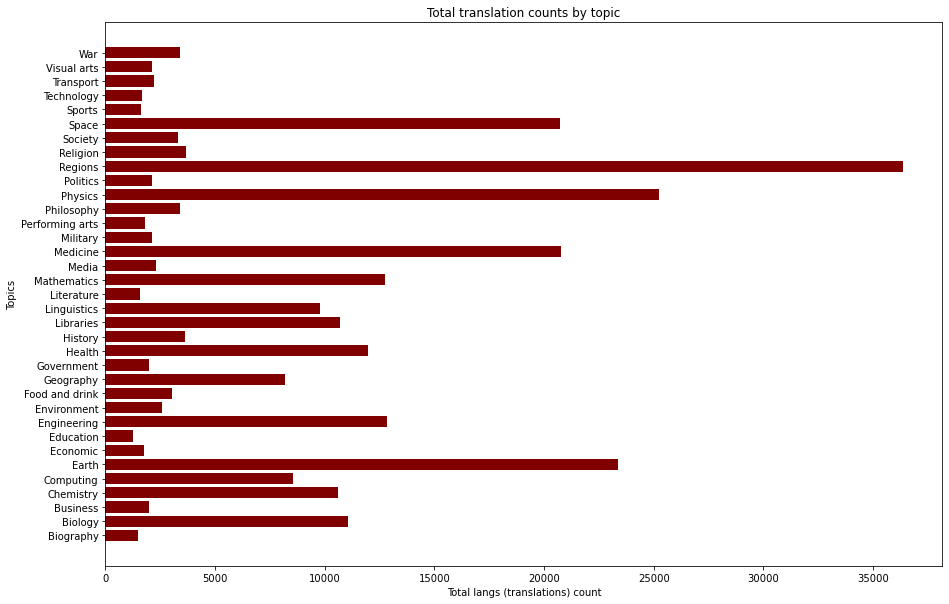

In [57]:
## Pie chart
import numpy as np
import matplotlib.pyplot as plt
 
data_pie = df.groupby(['category'])['langs_count'].sum()
courses = list(data_pie.index)
values = list(data_bpie.values)

fig = plt.figure(figsize = (15, 10))
plt.barh(courses, values, color ='maroon')     
 
plt.xlabel("Total langs (translations) count")
plt.ylabel("Topics")
plt.title("Total translation counts by topic")
plt.show()

In [59]:

df.groupby('category').mean()

,langs_count
category,
Biography,3.795866
Biology,63.936416
Business,5.207349
Chemistry,72.081633
Computing,46.340541
Earth,115.123153
Economic,6.054983
Education,4.141447
Engineering,51.991903


### 6. Explore further the groups of languages being translated and their pairs [optional]

In [1]:
#### English

In [ ]:
#### Czech

In [ ]:
#### Arabic

In [ ]:
#### Korean